## Analysis of extrasolar planets using the Doppler technique on stellar radial velocity data

## 1. Introduction

Extrasolar planets, or exoplanets, are those that orbit of stars other than the Sun. Their detection over the course of the last quarter century has been one of the most important discoveries in astronomy. These exoplanets add to our knowledge of cosmic processes and may expand the possibility of finding other habitable planets.

Two massive objects bound by gravity orbit around their center of mass (the barycentre). Therefore, the motion of each star is a function of their masses, the distance between them, their orbital shape, and the gravitational constant G. A common method to observe exoplanets is using the transit method in which a celestial body (typically the planet) passes in front of another- the planet's star. Obserivng the planet during this part of its orbit allows it to be seen by an observer as a dip in brightness of the host star; however, as the name suggests, this method only works if a transit takes place. This method allows for the relative density and size of the planet, with respect to its star, to be calculated. [1]

An alternative method is to measure the Doppler shift in the emmission lines of the star which is a detection method utilising indeirect evidence [1]. This can then be used to measure the small-amplitude orbital motions along the line of site of an observer (in this case, the Earth). Additionally, measuring the wavelength of emission lines form the star can be used to calculate its radial velocity - the star's projected velocity onto the vector connecting the star and the observer. The radial velocity, of a circular orbit, is calculated using

\begin{equation}
v_r = v_o + K \cos \left(\frac{2\pi(t-T_p)}{P}\right)
\tag{1}
\end{equation}

where
- $v_o$ is the average drift speed of the star relative to Earth in metres per second
- $t$ is time in days
- $T_p$ is the time when the orbit goes through periastron
- $K$ is the velocity semi-amplitude of the orbital motion in metres per second
- $P$ is the orbital period of the orbit in days


**This project focused on the analysis of given radial veocity data of several stars and fitting a theoretical fit to it in order to characterise both the star's planet as well as the orbit of this extrasolar planet.**

To complete this analysis, real data of the radial velocities of stars was used. From this, for one star at a a time, the radial velocity was plotted against time which, in turn, was used to determine the best fit of an orbit to the data. In an effort to simplify the task, the best fit of a circular orbit was used.

For this investigation, to fit a circular orbit to the star's data, a variant of the Metropolis-Hastings algorithm was used: this type of Markov chain Monte Carlo simulation is a random walk through parameter space and produced a series of states of the system. To start this process, a guess of the intial parameters in equation (1) were used so that they could be imporoved fromt the random walks.

Following this, the information collected from the fit was then used to characterise the orbit and the mass of the extrasolar planet.

Here, to characterise the orbit, the semi-major axis was calculated using

\begin{equation}
G(M_*+M_p) = a^3 \left( \frac{2\pi}{P} \right)^2
\tag{2}
\end{equation}

where
- $G$ is the gravitational constant
- $a$ is th esemi-major axis
- $M_*$ is the mass of the star (measured in solar masses, $M_{\odot} = 1.989 \times 10^{30}$ kg)
- $M_p$ is the planetary mass (in this report this will be measured in Jupiter masses, $M_J= 1.89964273\times 10^{27}$ kg)

For a circular orbit, $M_p/M_*\lesssim 10^{-2}$, so it can be disregarded when other uncertainties are larger. This is also the case in the following equation which was used the calculate the line of sight planetary mass:

\begin{equation}
K = \left(\frac{2\pi G}{P} \right)^{1/3}\frac{M_p \sin I}{(M_*+M_p)^{2/3}}\frac{1}{\sqrt{1-e^2}}
\tag{3}
\end{equation}

where
- $e$ is the orbital eccentricity (in this report, the data is being fit to a circular orbit so $e=0$)
- $I$ is the inclination of the orbit angular momentum relative to the radial vector joining the star and observer (the *line of sight* inclination).

From this equation, the radial velocity measurements only determine $M_p\sin I$.

Since in this case $M_p/M_*\lesssim 10^{-2}$, it can be predicted that the plots of radial velocity against the orbital phase (plotted below as phase-folded time) will be sinusoidal. [2] The phase-folded time for these plots was calculated by subtracting off the Julian date of the first measurement from all times, i.e. setting the first time value to zero and then expressing the rest relative to that.

In this project, the three data files used are for the following stars used are
- 51-Pegasi
- star-01
- star-02

## 2. Methods

The following method was used for the 51-Pegasi star and its planet 51-Pegasi b. The values of the four parameters ($v_0$, $T_p$, $K$, $P$) were known beforehand [3] which allowed the code to be checked, making sure similar results were obtained. This meant the method could be better adjusted prior to using data of unknown stars. This method was then applied to the star-01 and star-02 data files too.

### 2.1. Defining constants and assigning stellar properties to variables

In order to plot the radial velocity against time, the data file needs to be unpacked into sets of lists. For this, the numpy and matplotlib libraries are imported.

In [1]:
# Imports the libraries necessary for the project
import numpy as np
import matplotlib.pyplot as plt

Several constants are defined, and the name and mass of the three stars being analysed are also recorded into the appropriate variables.

In [2]:
# Define constants
G = 6.67408e-11

mass_sun = 1.989e30 # kg
mass_jup = 1.89964273e27 # kg
mass_ear = 5.97694449e24 # kg

au = 1.495978707e11 # kg

# Define the names and masses of the stars that will be analysed in this report
peg51_name, peg51_mass = "Peg-51", 1.04 * mass_sun
star1_name, star1_mass = "star-01", 1.17 * mass_sun
star2_name, star2_mass = "star-02", 1.51 * mass_sun

### 2.2. Extracting the data from the data file

From the numpy library, the loadtxt() command is used to read the data.

In the data files, there are three columns for the date (in Julian date), radial velocity and the error in radial velocity (both measured in m\s), respectively.

In [3]:
"""
Define a function to read in a data file and extract the data from its columns
Then calling the funciton for the data files of 3 stars, assigning the extracted data to 3 lists for each star
"""

# Reads the data file and extracts the 3 columns of data as 3 separate lists
def extract_data(filename):

    # Extracting data and unpacking it into 3 arrays
    date_days, rad_vel, rad_vel_err = np.loadtxt(filename, unpack = True)

    # Converting the extracted date from Julian dates to time in days
    time = date_days - date_days[0] # days

    return time, rad_vel, rad_vel_err

# Extract the data for 3 files and assigns each column from the file into a list
peg51_time, peg51_rad_vel, peg51_rad_vel_err = extract_data("51-Peg.dat")
star1_time, star1_rad_vel, star1_rad_vel_err = extract_data("star-01.dat")
star2_time, star2_rad_vel, star2_rad_vel_err = extract_data("star-02.dat")

### 2.3. Plotting the extracted and calculated radial velocity data for the star

Then the radial velocity (on the y-axis) is plotted against the time. In this, plt.errorbar() from matplotlib is used to plot the error in the radial velocity as the error bars.

Furthermore, to improve the appearance of the graph and increase the information it holds, xlabel(), ylabel() and title() are used to label the different parts of the plot. Additionally, grid() is used to impose a grid on the graph, allowing the data points to be read off easily.

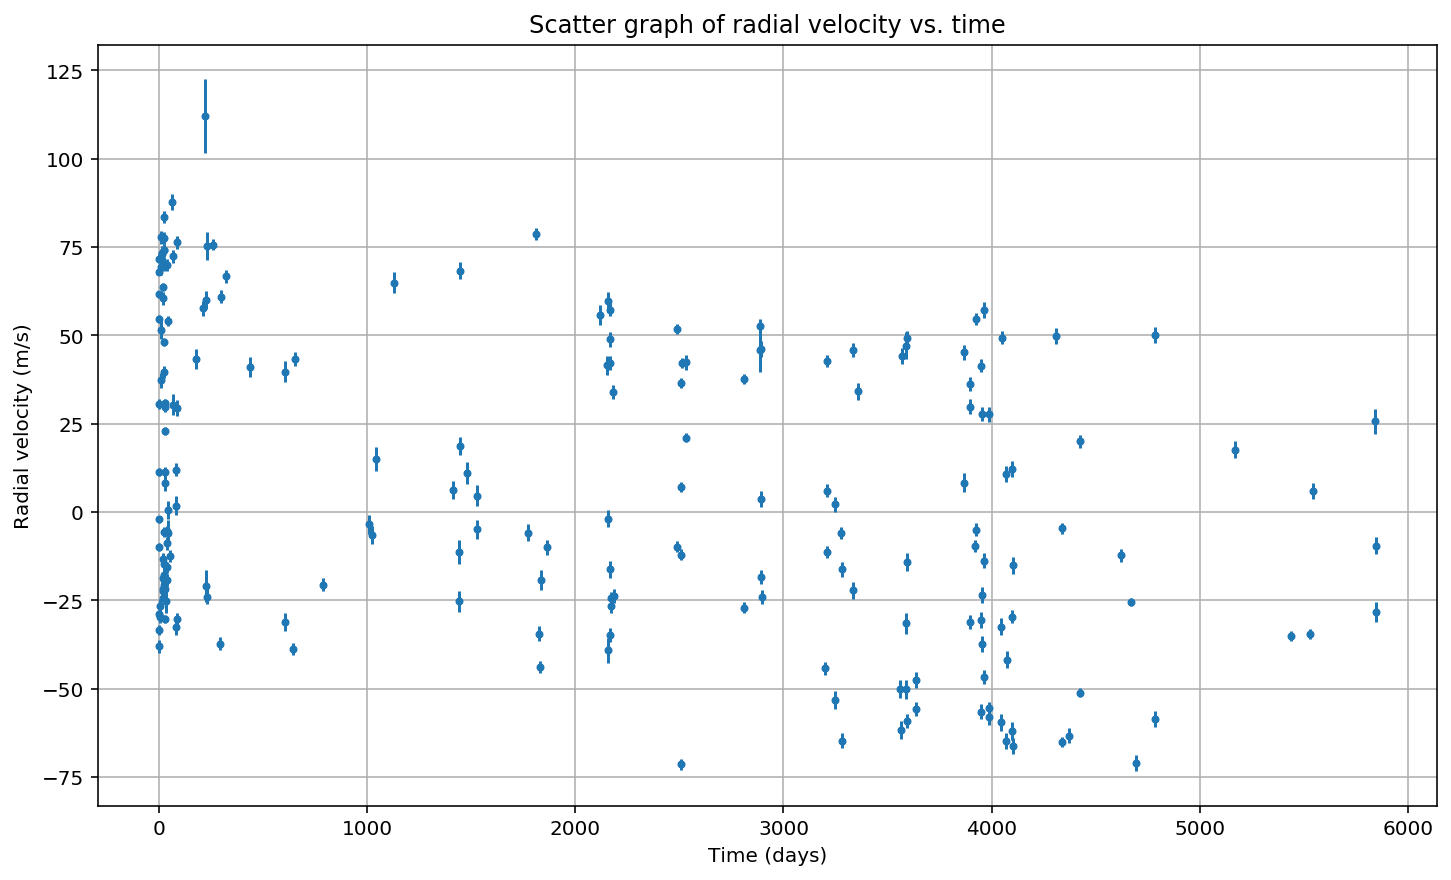

In [4]:
# Takes the given extracted data and plots it on a scatter graph
def plot_extracted_data(time, rad_vel, rad_vel_err):

    plt.figure()

    # Extracted radial velocity vs. time
    plt.scatter(time, rad_vel, marker = '.', color = 'b', linewidths = 0.5)

    plt.title('Scatter graph of radial velocity vs. time')
    plt.xlabel('Time (days)')
    plt.ylabel('Radial velocity (m/s)')

    # Add error bars using the uncertainties in radial velocity extracted from the data file
    plt.errorbar(time, rad_vel, fmt = '.', yerr = rad_vel_err)

    plt.grid()

plot_extracted_data(peg51_time, peg51_rad_vel, peg51_rad_vel_err)

To begin the fit of the data, the initial parameters- used in equation (1), were approximated through a series of trial and error, starting with the value of the orbital period, P. For this, the calc_rad_vel() function was defined. As part of this, the cos and pi functions were used from the imported numpy library. As seen below, this function takes in two arguments: the time list and a tuple of the four parameters. The function then splits the tuple into its separate components and use them in tandem with the list of times to calculate a list of radial velocities, that adhere to a circular orbit, corresponding to the given times.

In [5]:
# Calcultes an approximate radial velocity given the 'time' array and a set of parameters
def calc_rad_vel(time, param):

    v0, Tp, K, P = param # Unpacks the tuple into its separate values
    rad_vel = v0 + (K * np.cos( (2 * np.pi * (time - Tp)) / P ))

    return rad_vel # m/s

The extracted and calculated radial velocities were then plotted versus the time in order to show how accurate the guessed values of the parameters were. Here, the guesses were stored in the tuple 'param51_param_guess' and the values were:
- $v_o$ = 15 m\s
- $T_p$ = 2.4 days
- $K$ = 56 m\s
- $P$ = 4.2307 days

For this plot, the plot_data() function was defined so that it could be used for the other two stars with just two lines of code: the guessed parameter values and calling the function with the appropriate arguments. This avoided rerwriting the necessary code for the function multipile times.

To distinguish between the extracted and calculated radial velocities, different colours were used for both, blue for the extracted and red for the calculated velocitites.

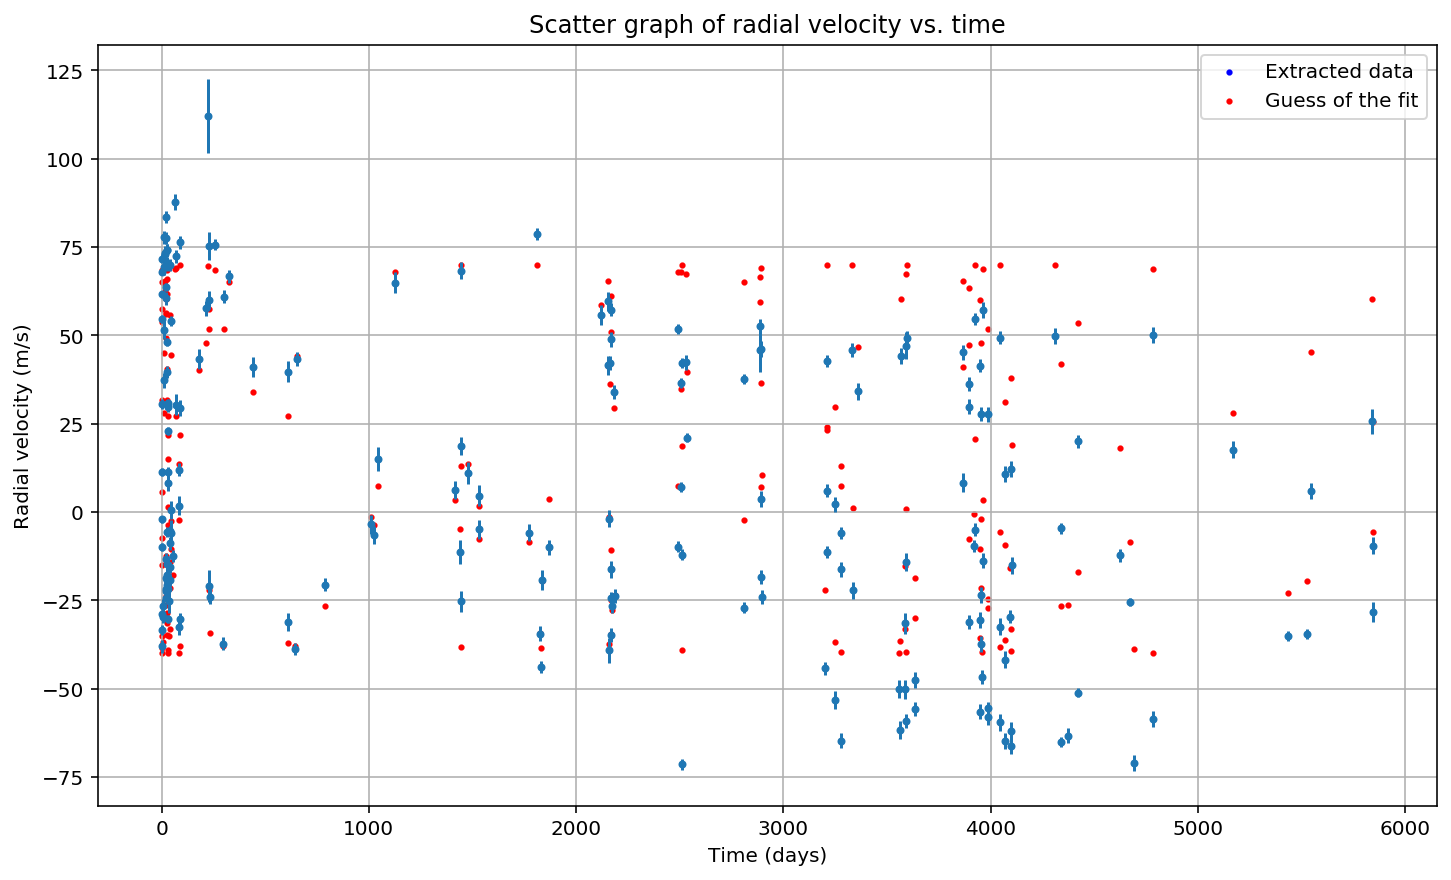

In [6]:
# PLots the given data, but also plots the guessed fit onto the same graph
def plot_data(time, rad_vel, rad_vel_err, param):

    v0, Tp, K, P = param

    plt.figure()

    # Extracted radial velocity vs. time:
    plt.scatter(time, rad_vel, marker = '.', color = 'b', linewidths = 0.1, label = 'Extracted data')
    plt.errorbar(time, rad_vel, fmt = '.', yerr = rad_vel_err)

    # Approximated radial velocity vs. time:
    plt.scatter(time, calc_rad_vel(time, param), marker = '.', color = 'r', linewidths = 0.1, label = 'Guess of the fit')

    plt.title('Scatter graph of radial velocity vs. time')
    plt.xlabel('Time (days)')
    plt.ylabel('Radial velocity (m/s)')
    plt.legend()
    plt.grid()

peg51_param_guess = 15, 2.4, 55, 4.2307

plot_data(peg51_time, peg51_rad_vel, peg51_rad_vel_err, peg51_param_guess)

To further examine the guessed orbital period value, P, the same radial velocities were plotted but with the phase-folded time instead. This was coded for using the modulo function (%) to wrap the time every orbital period so that the time runs from 0 to the guessed value of P. Here, the guessed P was used by calling the fourth element of the 'peg51_param_guess' tuple.

From this, a single oscillation and a close line of best fit are expected which was the case. Again, the extracted and calculated radial velocities were separated using colour.

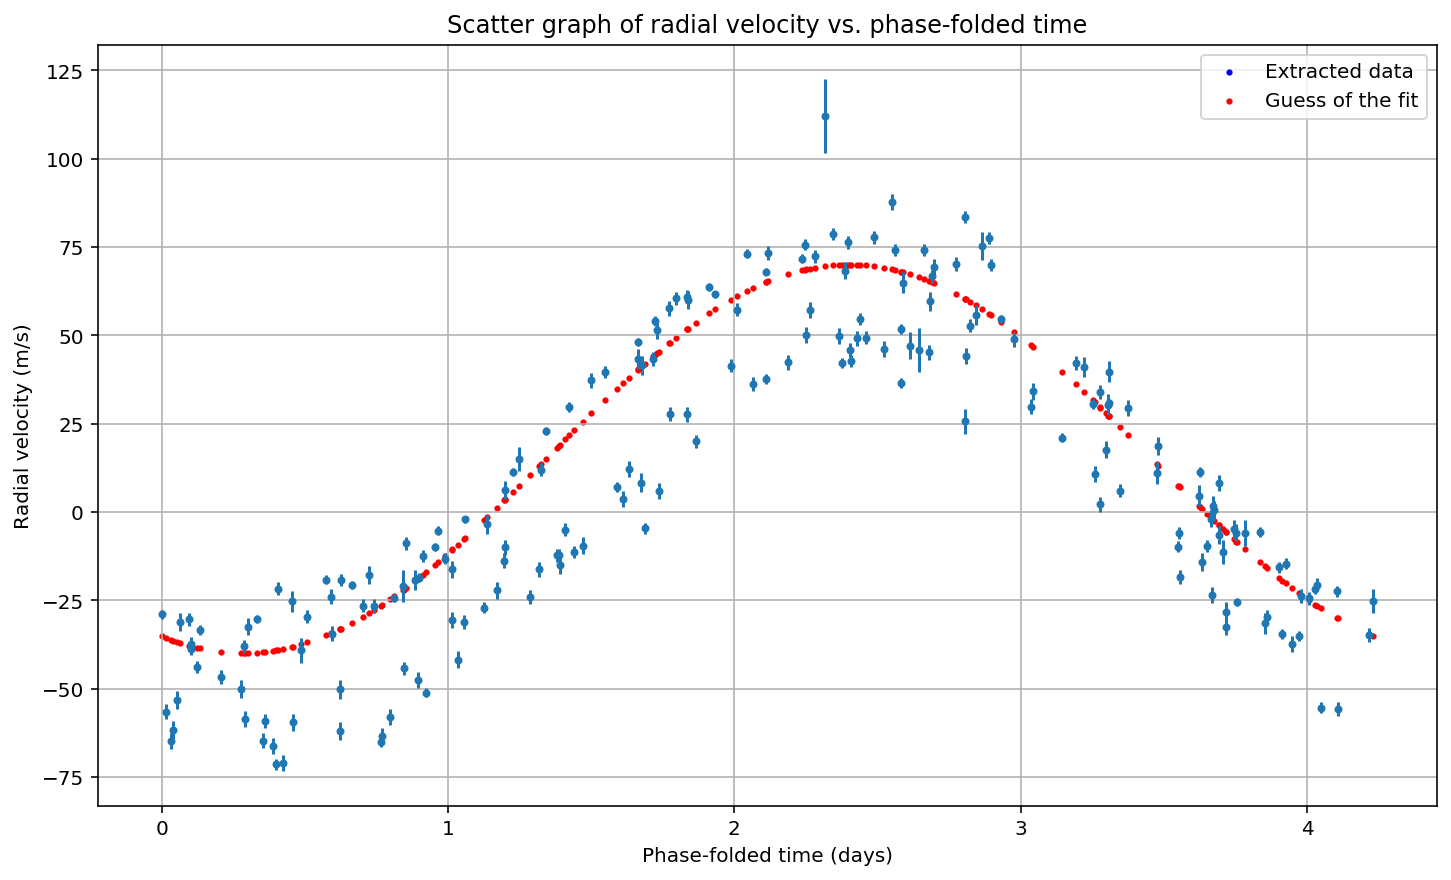

In [7]:
# Plots the extracted and calculated radial velocities against phase-folded time
def plot_fit(time, tfolded, rad_vel, rad_vel_err, param):

    v0, Tp, K, P = param

    plt.figure()

    # Extracted radial velocity vs. phase-folded time:
    plt.scatter(tfolded, rad_vel, marker = '.', color = 'b', linewidths = 0.1, label = 'Extracted data')
    plt.errorbar(tfolded, rad_vel, fmt = '.', yerr = rad_vel_err)

    # Approximated radial velocity vs. phase-folded time:
    plt.scatter(tfolded, calc_rad_vel(time, param), marker = '.', color = 'r', linewidths = 0.1, label = 'Guess of the fit')

    plt.title('Scatter graph of radial velocity vs. phase-folded time')
    plt.xlabel('Phase-folded time (days)')
    plt.ylabel('Radial velocity (m/s)')
    plt.legend()
    plt.grid()

# Calculate phase-folded time for plotting phase-folded radial velocity, below
peg51_tfolded = (peg51_time - peg51_time[0]) % peg51_param_guess[3] # days

plot_fit(peg51_time, peg51_tfolded, peg51_rad_vel, peg51_rad_vel_err, peg51_param_guess)

### 2.4. Using a Markov chain Monte Carlo simulation to calculate the parameters

To imporove the guessed best fit from above, the Metropolis-Hastings variant of the MCMC simulation wsa used. As part of this, the acceptance condition was 

$$
\\ 
\text{random()}  < \exp\{-\beta(\chi^2_{i}-\chi^2_{i-1})\},
\\
$$
Or if
$$
\\
\chi^2_{i}-\chi^2_{i-1} = 0
\\
$$
where $i$ indicates the proposed state and $i-1$ the previous one.

The MCMC simulation uses the ${\chi^2}$ function to show the comparison between the observed data and the expected data. For this, a ${\chi^2}$ was minimised in the following form

$$
\chi^2 = \frac{1}{N}\sum_{i=1}^N \left( \frac{y_\text{fitted}(x_i) - y_i)}{\sigma_i} \right)^2
$$
where $\sigma_i$ is the error in the measured $y_i$ values and N is the number of points such that the function is normalised to the number of points and the error in the measurement of each value.

This was then defined as a function, as seen in the cell below.

In [8]:
# Function to calculate the weighted chi^2 given the fitting function, extractde data and the fitting parameters
def weighted_chi2(fitting_function, data, param_fit):

    data_x, data_y, data_y_err = data # Unpacks the data tuple

    N = len(data_y) # The number of points is equal to the length of the list

    fit_y = fitting_function(data_x, param_fit)

    return sum(((fit_y - data_y) / data_y_err) ** 2) / N

In addition to the function for ${\chi^2}$, a similar function for the residuals was also created, below, which was just the difference between the expected and observed radial velocities. This difference is the numerator in the ${\chi^2}$ function shown above.

In [9]:
# Function to calculate the residuals between the fit and the data (observations)
def calc_residual(time, rad_vel, param):

    v0, Tp, K, P = param
    observed = rad_vel # Extracted radial velocity
    expected = calc_rad_vel(time, param) # Calculated radial velocity

    return expected - observed

For the MCMC fit below, random() and seed() were imported from numpy.random subsection of numpy. The simulations were defined as a function in part due to its length so that it can be called numerous times using only three lines.

In this project, the number of steps in the random walk carried out by the MCMC simulation was 100,000; however, this can easily be changed to, for example, 1,000,000 which would likely be for debugging the code. Though more accurate, 1,000,000 steps were not preferred here as they use too much memory and, as a result, take too long to run.

To be able to use the MCMC, appropriate step sizes had to be used for each parameter (%v_0, T_p, K, P%) which were all below 1% the size of the parameter guess. This was the case for 51-Peg as the initial parameter guesses were particularly close to the actual parameter values. Hence, smaller step sizes were needed.

After this, the ${\chi^2}$ value for the set of parameters was calculated as part of the function. To normalise this value, it was divided by the number of steps (the length of the parameter lists sent to the weighted_chi2() function in the for loop) which was then appended to the chisq list.

Finally, a new figure was created and a log-log plot of the ${\chi^2}$ values vs. iteration number was printed.

In [10]:
from numpy.random import random, seed

def MCMC_fit(nsteps, beta, step_sizes, data, params):
    seed()           # random number generator seed

    v0_step_size, Tp_step_size, K_step_size, P_step_size = step_sizes

    # initial guesses
    current_v0, current_Tp, current_K, current_P = params

    current_chisq = weighted_chi2(calc_rad_vel, data, (current_v0, current_Tp, current_K, current_P))

    v0, Tp, K, P, chisq = [current_v0], [current_Tp], [current_K], [current_P], [current_chisq] # Creates list of length 1 with the current parametere value as the only entry

    for i in range(nsteps): # Runs from 0 to 'nsteps'

        # The parameter value increase or decrease by a random number
        # The range the random number could fall in is adjusted from 0-1 by 'stretching' and then 'translating' the range.
        v0_step = ((v0_step_size - (-v0_step_size)) * random()) + (-v0_step_size)
        Tp_step = ((Tp_step_size - (-Tp_step_size)) * random()) + (-Tp_step_size)
        K_step = ((K_step_size - (-K_step_size)) * random()) + (-K_step_size)
        P_step = ((P_step_size - (-P_step_size)) * random()) + (-P_step_size)

        # The new values are calculated by adding on the (positive or negative) step size to the previous value
        new_v0 = current_v0 + v0_step
        new_Tp = current_Tp + Tp_step
        new_K = current_K + K_step
        new_P = current_P + P_step

        new_chisq = weighted_chi2(calc_rad_vel, data, (new_v0, new_Tp, new_K, new_P))

        dchisq = new_chisq - current_chisq

        if dchisq < 0 or random() < np.exp(-beta * dchisq): # Only runs if the acceptance condition, above, is met
            current_v0 = new_v0
            current_Tp = new_Tp
            current_K = new_K
            current_P = new_P
            current_chisq = new_chisq

        # The values of the parameters are added to their lists, regardless of the value being updated to not
        v0.append(current_v0)
        Tp.append(current_Tp)
        K.append(current_K)
        P.append(current_P)
        chisq.append(current_chisq)

    # Plot chi-squared vs iteration number
    plt.figure()
    plt.title(f"MCMC Simulation with $n = {nsteps}$ steps")
    plt.xlabel('Iteration')
    plt.ylabel('$\chi^2$')
    plt.loglog(chisq)

    return (v0, Tp, K, P, chisq) # Returns the paramter values to be used later on

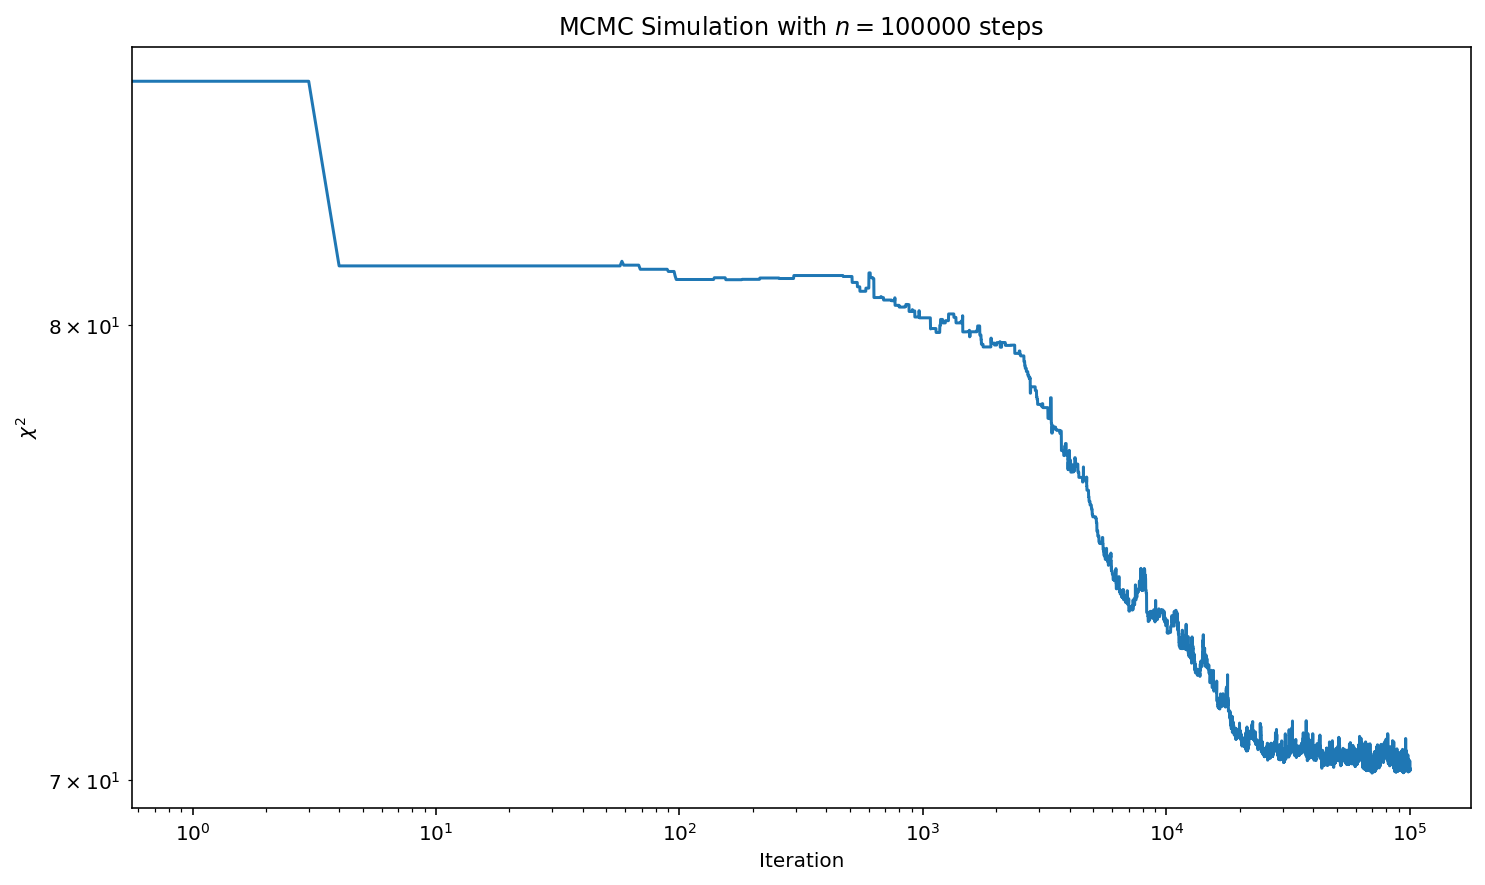

In [11]:
peg51_step_sizes = 0.05, 0.005, 0.05, 0.0005
peg51_data = peg51_time, peg51_rad_vel, peg51_rad_vel_err # The data we're fitting

# The code below plots the log-log graph (a part of the function) and unpacks the tuple returned
peg51_v0, peg51_Tp, peg51_K, peg51_P, peg51_chisq = MCMC_fit(100_000, 10, peg51_step_sizes, peg51_data, peg51_param_guess)

Following this, the posterior of the log-log plot was identified at an iteration of 70,000. The plot after this iteration was sliced and kept, the rest was discarded for the following tasks.

The location of the posterior varies with each data set, so it must be identified every time.

This also involves finding the lowest $\chi^2$ and it's index, and then finding the parameter values corresponding to that index.

In [12]:
"""
Isolate the posterior from the chi^2 plot and then save the parameter values at the lowest chi^2 in variables.
"""

peg51_slice = 70_000 # Marks the start of the posterior

# Slices the posterior for each paramter list and the chi^2 list
peg51_v0_post = peg51_v0[peg51_slice:]
peg51_Tp_post = peg51_Tp[peg51_slice:]
peg51_K_post = peg51_K[peg51_slice:]
peg51_P_post = peg51_P[peg51_slice:]
peg51_chisq_post = peg51_chisq[peg51_slice:]

peg51_min = np.argmin(peg51_chisq_post) # Fids the index of the minimum value of chi^2 in the posterior

# Finds the parameter values at the above index
peg51_v0_min = peg51_v0_post[peg51_min]
peg51_Tp_min = peg51_Tp_post[peg51_min]
peg51_K_min = peg51_K_post[peg51_min]
peg51_P_min = peg51_P_post[peg51_min]
peg51_chisq_min = peg51_chisq_post[peg51_min]

The extracted and the fitted radial velocity were plotted against time using the parameter values associated with the lowest $\chi^2$ (calculated in the cell above).

As well as this, this lowest $\chi^2$ value was also printed out alont with the parameter values at this point.

Weighted chi-squared = 70.14558345861023
v0 = 8.986497538284322
Tp = 2.3566403502345854
K = 55.453178750255546
P = 4.230853254125848


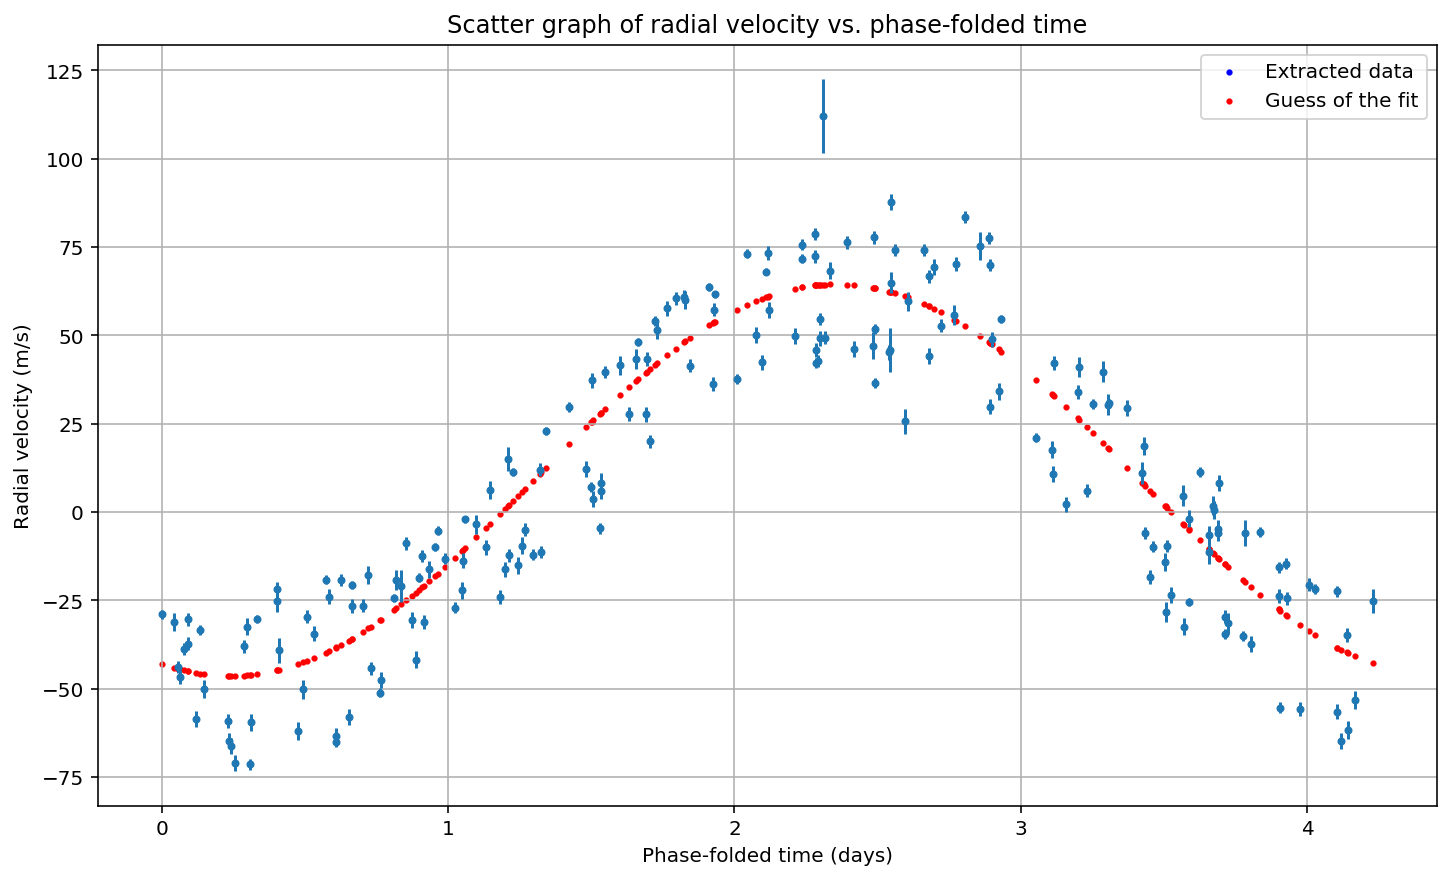

In [13]:
peg51_param_fitted = peg51_v0_min, peg51_Tp_min, peg51_K_min, peg51_P_min # Assigns the minimum values from above to a tuple for compactness

peg51_tfolded = (peg51_time - peg51_time[0]) % peg51_param_fitted[3] # Calculates the updated phase-folded time using the updated orbital period value

print("Weighted chi-squared =", weighted_chi2(calc_rad_vel, (peg51_time, peg51_rad_vel, peg51_rad_vel_err), peg51_param_fitted)) # Calculates the chi^2 value using the chi^2 function

# Prints the minimum parameter values
print("v0 =", peg51_param_fitted[0])
print("Tp =", peg51_param_fitted[1])
print("K =", peg51_param_fitted[2])
print("P =", peg51_param_fitted[3])

plot_fit(peg51_time, peg51_tfolded, peg51_rad_vel, peg51_rad_vel_err, peg51_param_fitted) # Plots the fit of the data using the new parameter values

### 2.5. Characterising the exoplanet

#### 2.5.1. Calculating the semi-major axis

Having already defined the necessary constants in cell 10, the semi-major axis can be calculated using equation (2). To avoid repeating code, this equation was defined as the function below.

In [14]:
# Function to calcultes the semi-major axis given orbital period, and the stellar mass
def calc_sem_majorax(P, mass_star):

    a_3 = (((P * 24 * 60 * 60) / (2 * np.pi)) ** 2) * G * mass_star # Rearrange for semi-major axis cubed, a^3

    a = np.cbrt(a_3) # Cube root to calculate a

    a_au = a / au

    return a_au

#### 2.5.2. Calculating the mass of the exoplanet

Similarly, to calculate the mass of the exoplanet, equation (3) was written as the following function.

In [15]:
# Function to calculate the product of the planet mass of the line of sight inclination.
def calc_mass_plan_inc(P, K, mass_star):

    mass_plan_inc = K * np.cbrt(((P * 24 * 60 * 60) * (mass_star ** 2)) / (2 * np.pi * G))

    mass_plan_jup = mass_plan_inc / mass_jup

    return mass_plan_jup

These two functions were then used in conjunction with the code above to repeat the fitting process for the 'star-01' and 'star-02' data files.

## 3. Results

This section includes the graphs for the 'star-01' and 'star-02' data files as well as the calculated semi-major axis and planetary mass for all three stars. The variables and lists created for both of theese stars in the Methods section will be used here.

### 3.1. Graphs for star-01

The raw data was plotted in a radial velocity vs. time graph to get a sense of the orbit and to form a rough shape of the fit that may be plotted on it.

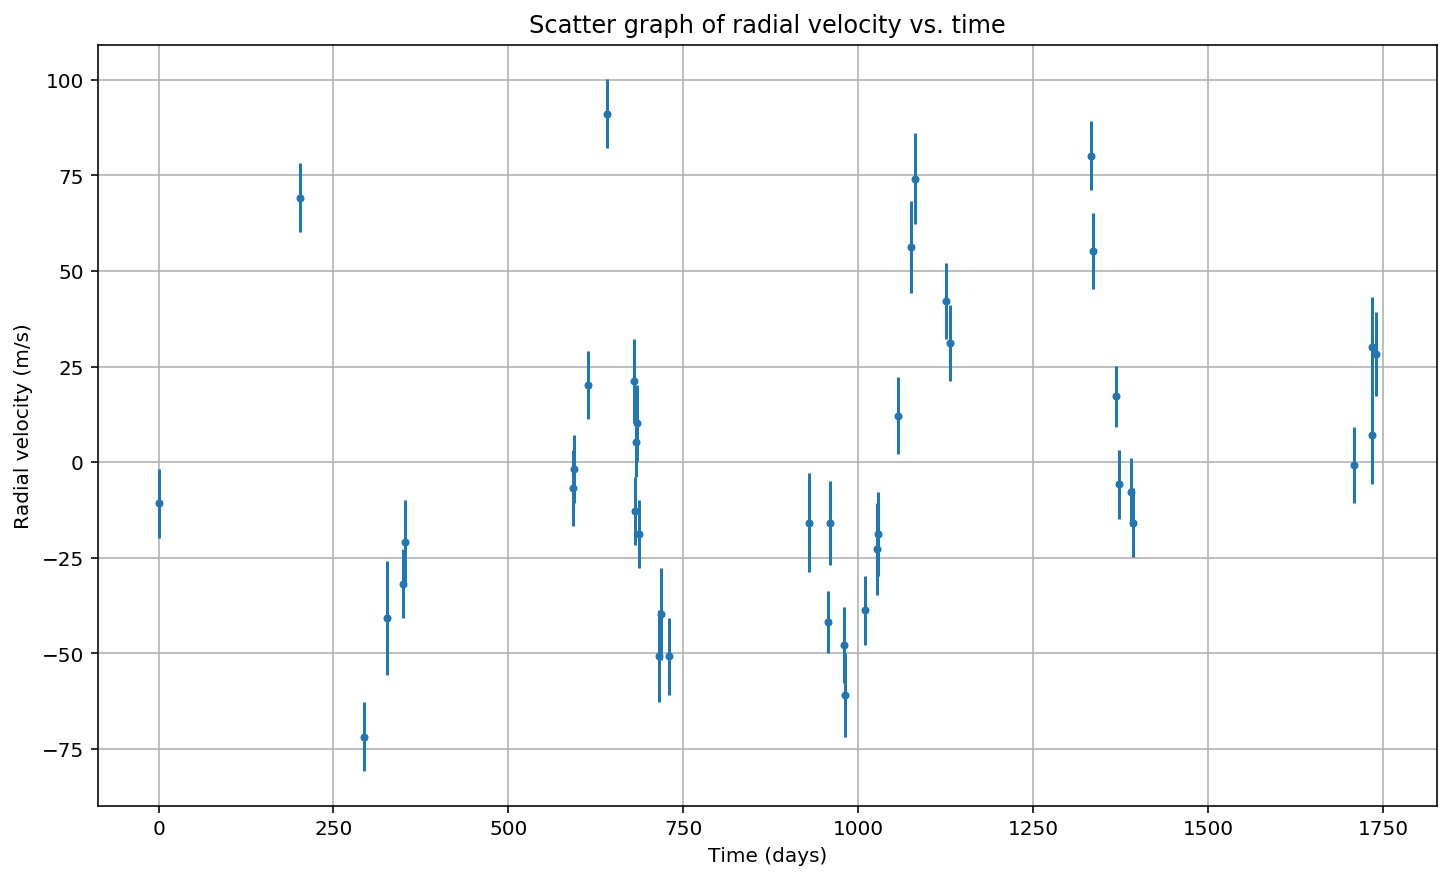

In [16]:
plot_extracted_data(star1_time, star1_rad_vel, star1_rad_vel_err)

Next, a fit formed using the 'time' list and the guess of paramters was imposed on the plot of extracted data from the cell above. By using storing the parameters in a tuple, fewer arguments need to be passed to the plot_data() function while each paramter value can be individually altered.

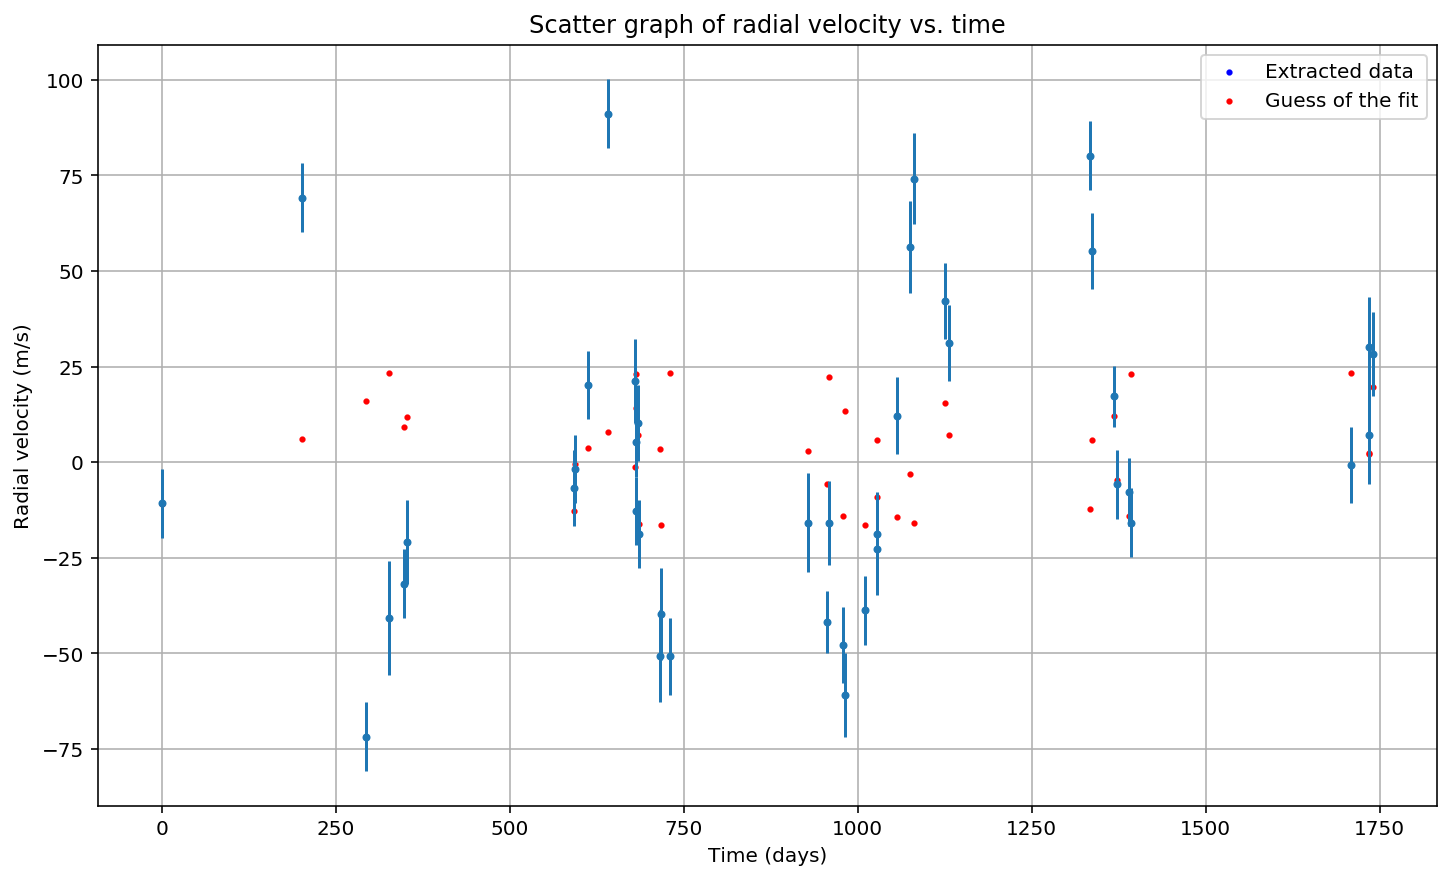

In [17]:
star1_param_guess = 3.5, 10.9, 20, 7.9

plot_data(star1_time, star1_rad_vel, star1_rad_vel_err, star1_param_guess)

The plot of the extracted and guessed radial velocities vs. time were then replotted below, but with the phase-folded time on the x-axis instead. This showed the points over a single orbital phase and, as predicted in the Introductino section above, the fit was sinusoidal in shape.

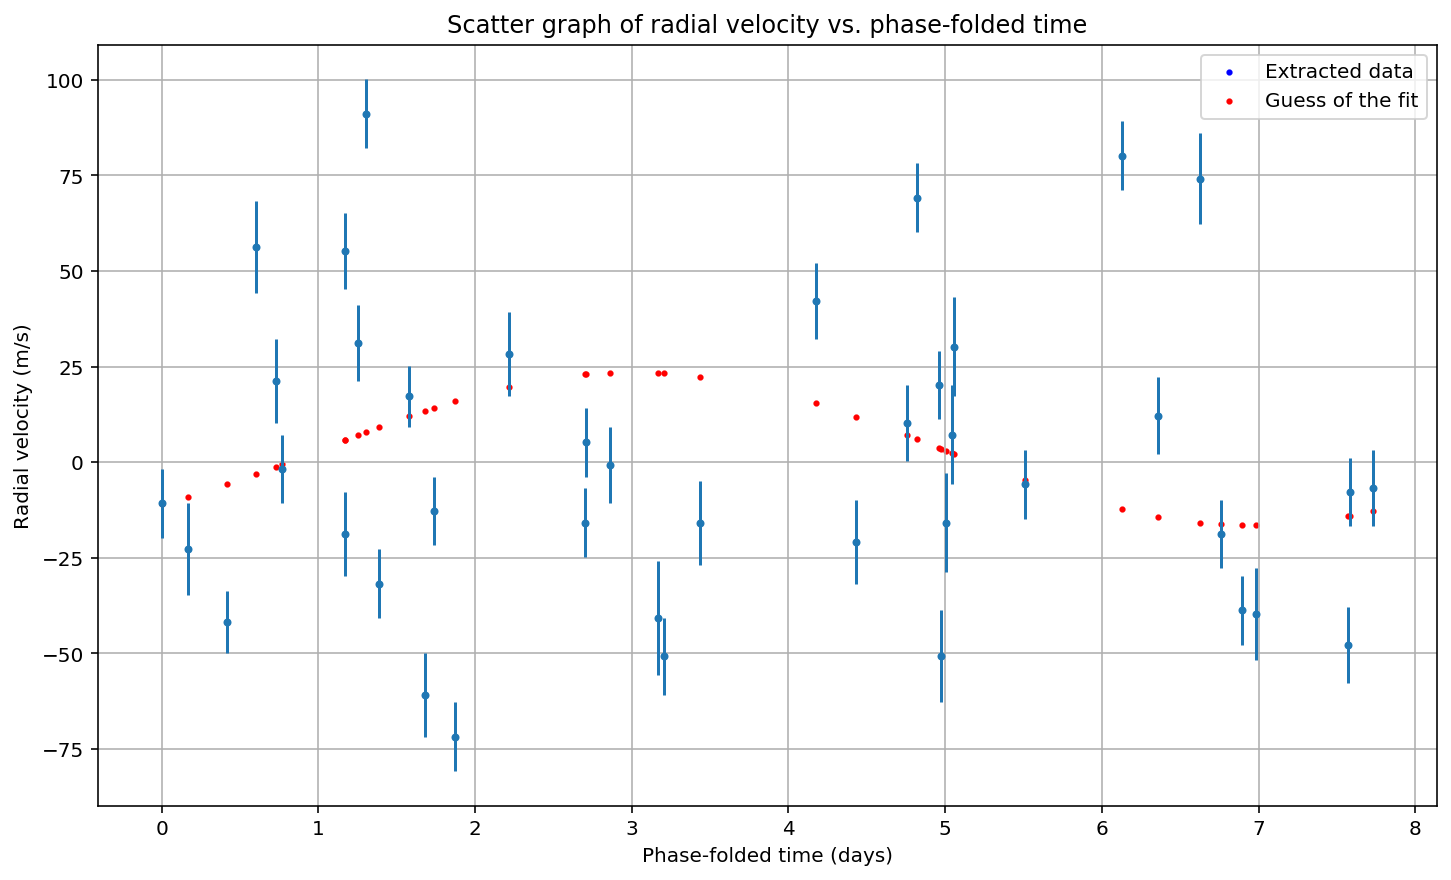

In [18]:
# Calculate phase-folded time for plotting phase-folded radial velocity, below
star1_tfolded = (star1_time - star1_time[0]) % star1_param_guess[3] # days

plot_fit(star1_time, star1_tfolded, star1_rad_vel, star1_rad_vel_err, star1_param_guess)

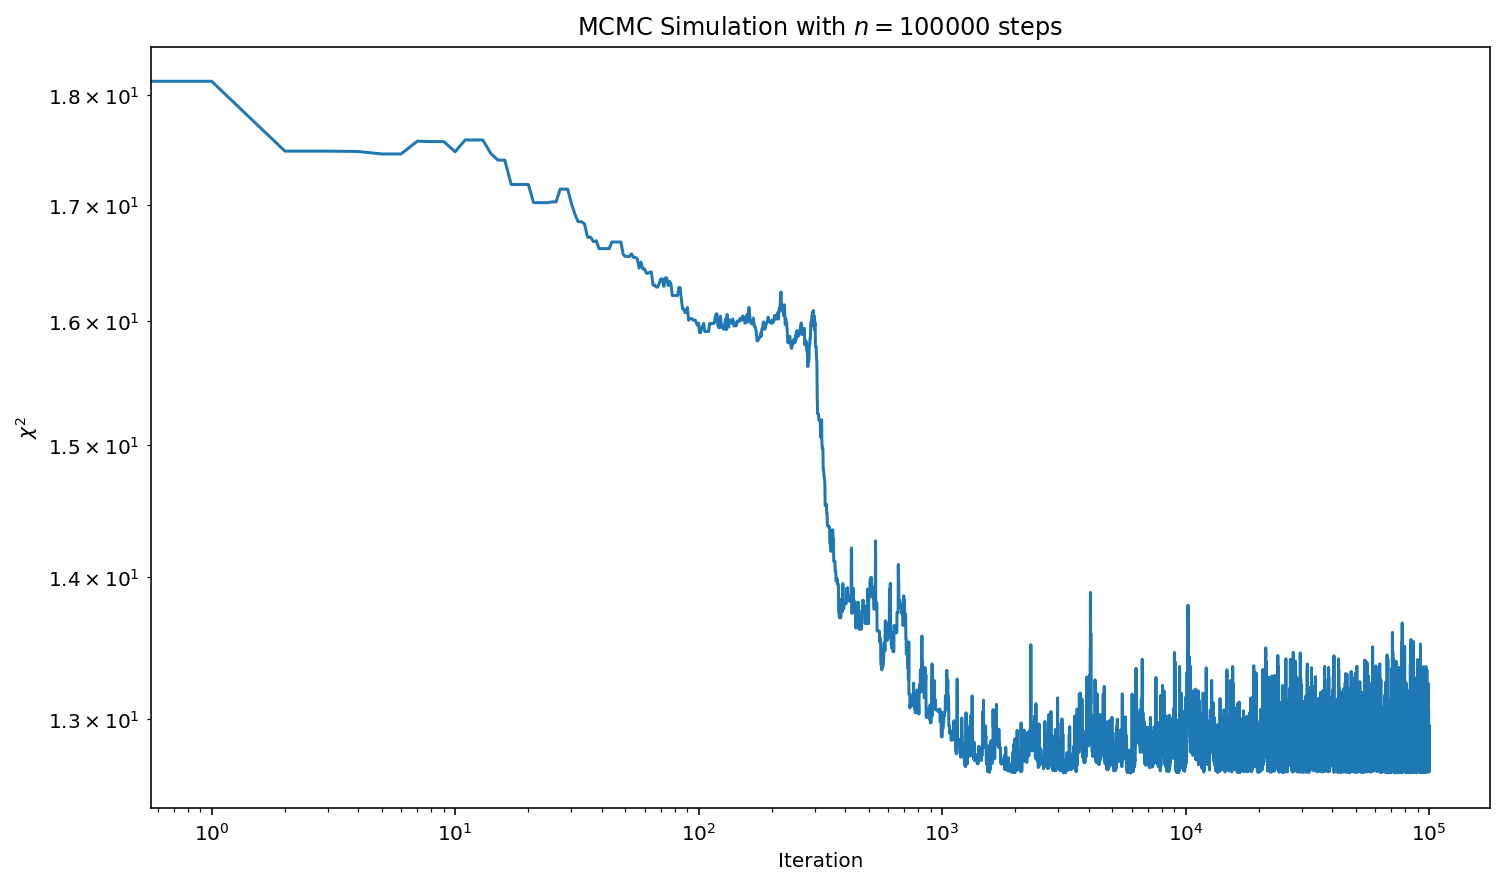

In [19]:
star1_step_sizes = 0.001, 0.1, 1, 0.01
star1_data = star1_time, star1_rad_vel, star1_rad_vel_err # The data we're fitting

star1_v0, star1_Tp, star1_K, star1_P, star1_chisq = MCMC_fit(100_000, 10, star1_step_sizes, star1_data, star1_param_guess)

In [20]:
"""
Isolate the posterior from the chi^2 plot and then save the parameter values at the lowest chi^2 in variables.
"""

star1_slice = 30_000

star1_v0_post = star1_v0[star1_slice:]
star1_Tp_post = star1_Tp[star1_slice:]
star1_K_post = star1_K[star1_slice:]
star1_P_post = star1_P[star1_slice:]
star1_chisq_post = star1_chisq[star1_slice:]

star1_min = np.argmin(star1_chisq_post)

star1_v0_min = star1_v0_post[star1_min]
star1_Tp_min = star1_Tp_post[star1_min]
star1_K_min = star1_K_post[star1_min]
star1_P_min = star1_P_post[star1_min]
star1_chisq_min = star1_chisq_post[star1_min]

Weighted chi-squared = 12.642388654744137
v0 = 3.4971752726970364
Tp = 10.99352949098161
K = 25.191913270100404
P = 7.974908360911188


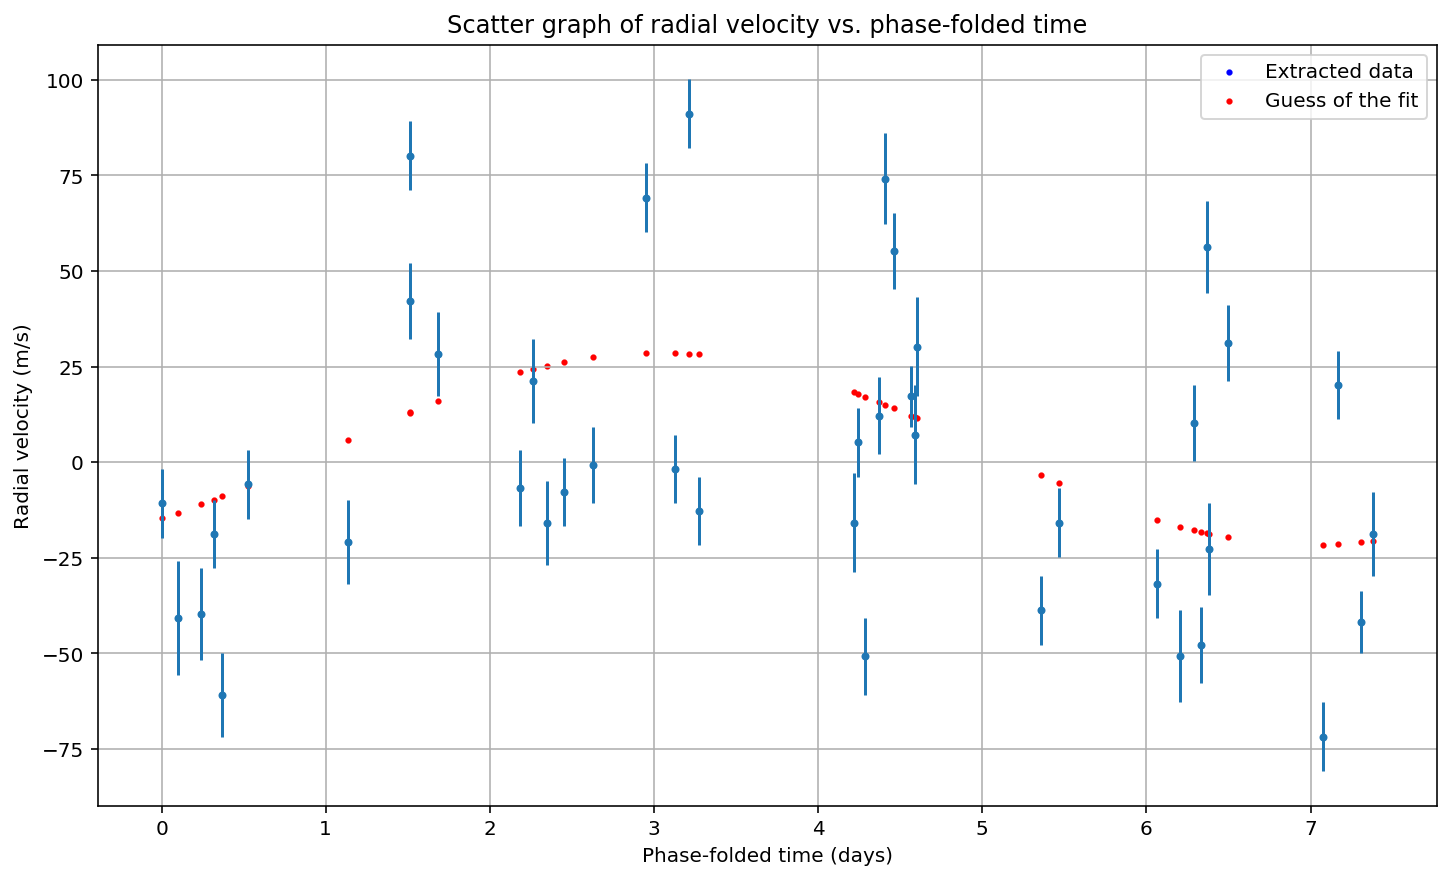

In [21]:
star1_param_fitted = star1_v0_min, star1_Tp_min, star1_K_min, star1_P_min

star1_tfolded = (star1_time - star1_time[0]) % star1_param_fitted[3]

print("Weighted chi-squared =", weighted_chi2(calc_rad_vel, (star1_time, star1_rad_vel, star1_rad_vel_err), star1_param_fitted))

print("v0 =", star1_param_fitted[0])
print("Tp =", star1_param_fitted[1])
print("K =", star1_param_fitted[2])
print("P =", star1_param_fitted[3])

plot_fit(star1_time, star1_tfolded, star1_rad_vel, star1_rad_vel_err, star1_param_fitted)

### 3.2. Graphs for star-02

The graphs below follow the same order as for those plotted above using data from the 'star-01' data file.

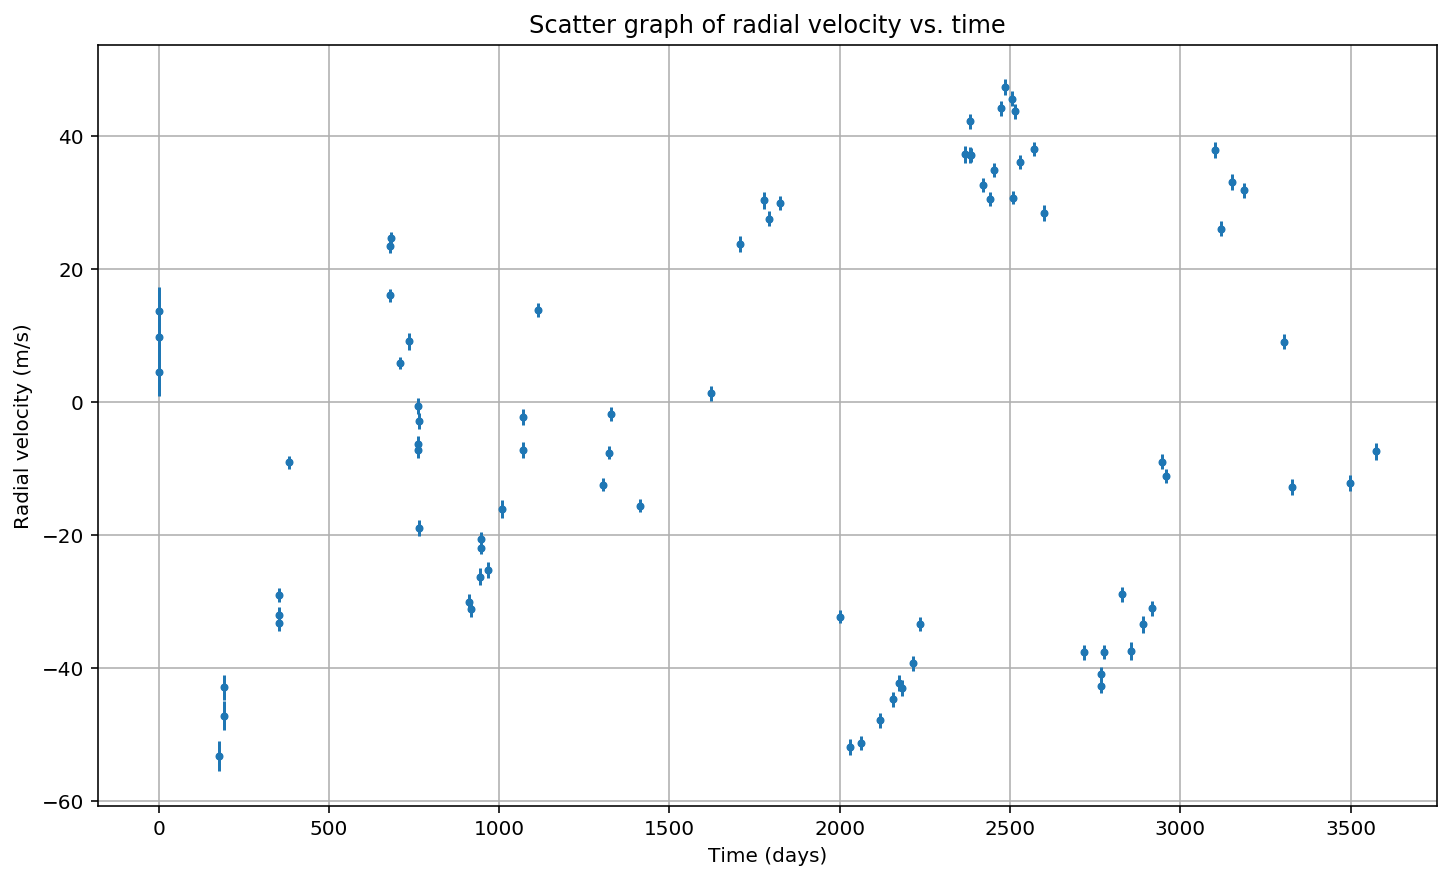

In [22]:
plot_extracted_data(star2_time, star2_rad_vel, star2_rad_vel_err)

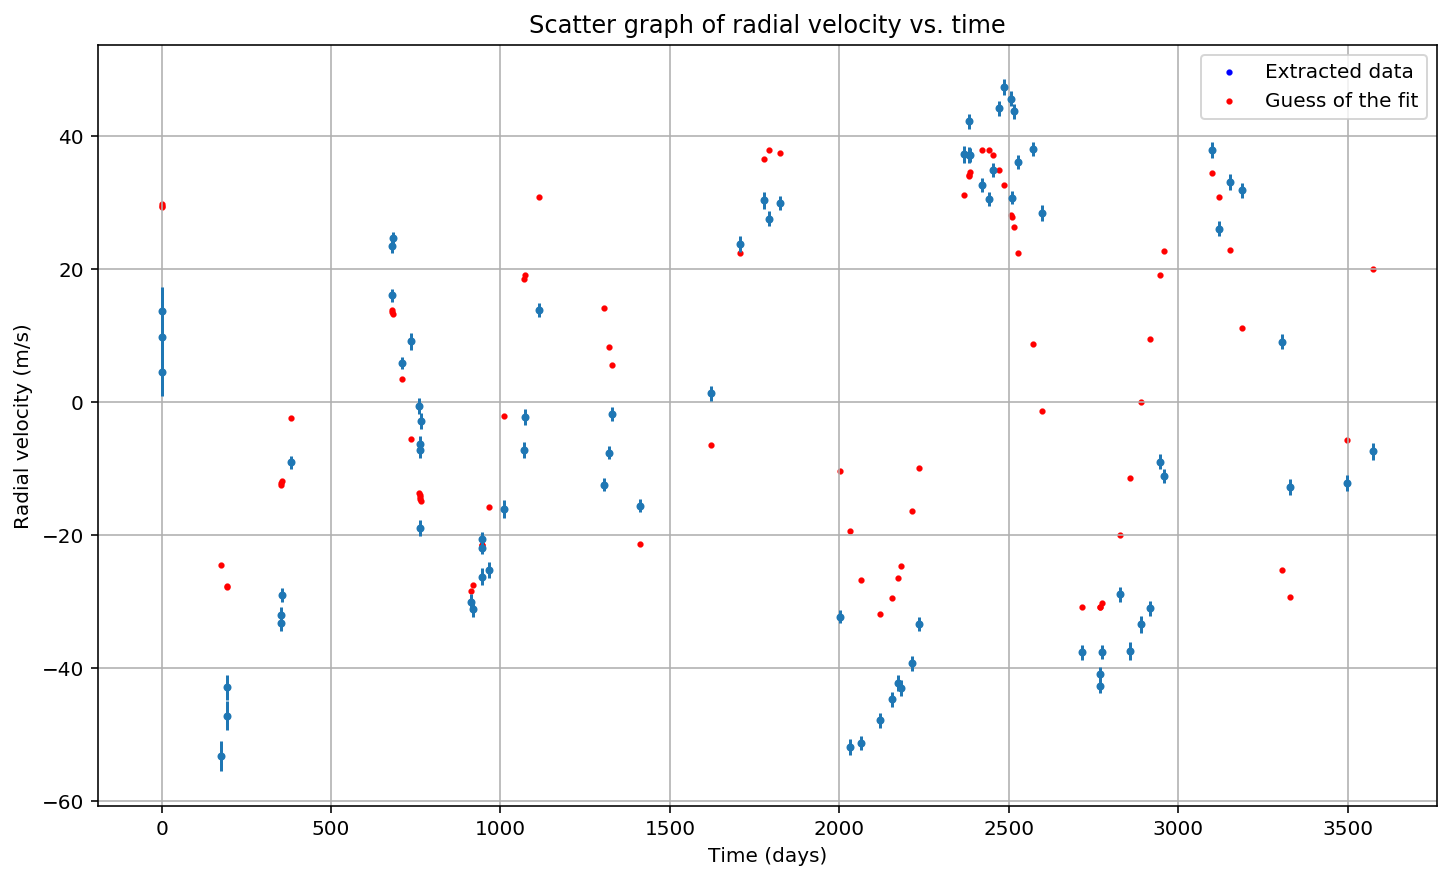

In [23]:
star2_param_guess = 3, 555, 35, 625

plot_data(star2_time, star2_rad_vel, star2_rad_vel_err, star2_param_guess)

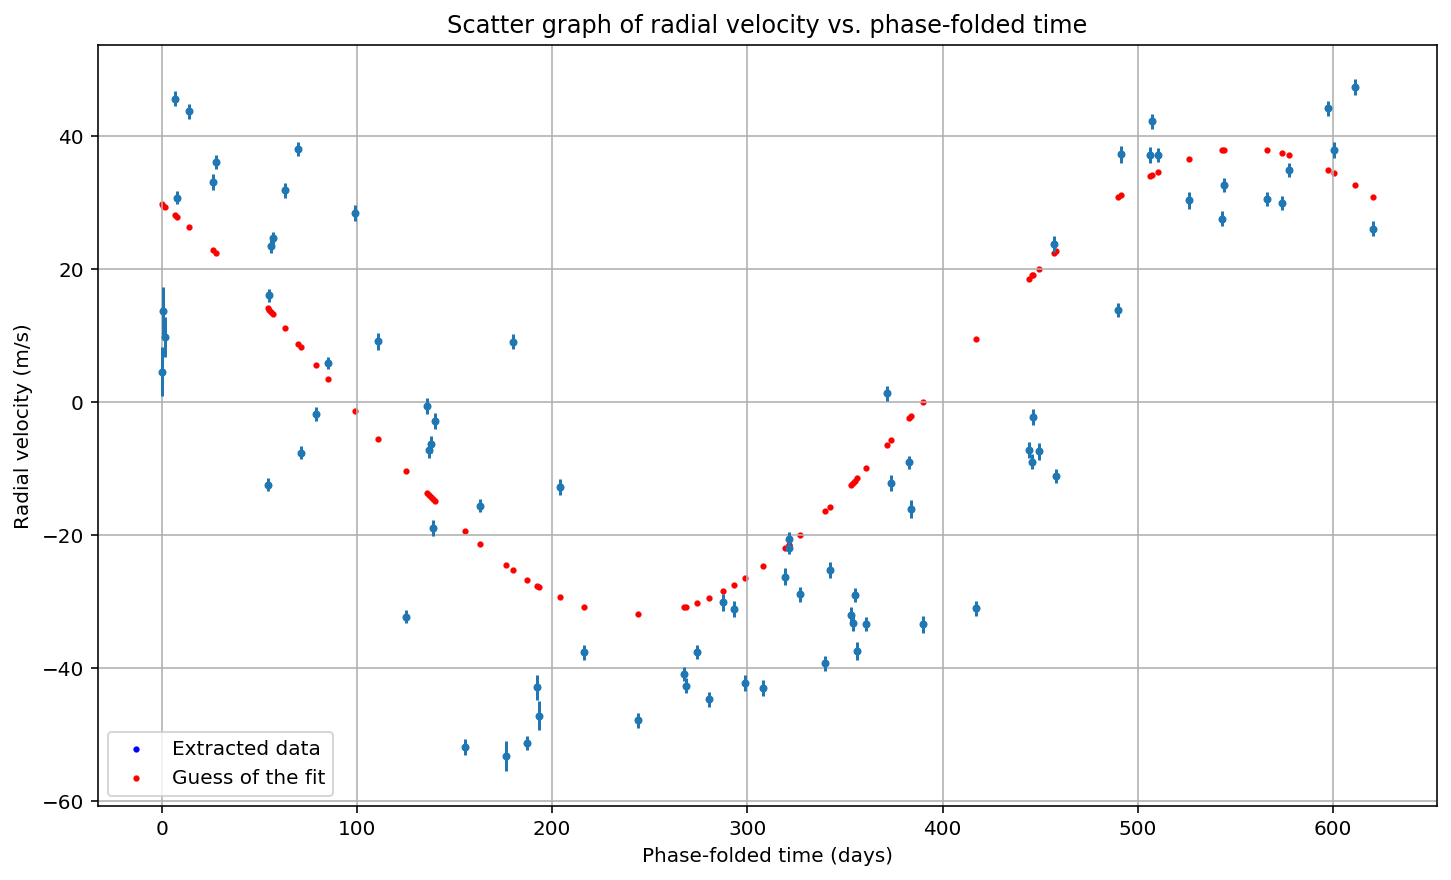

In [24]:
# Calculate phase-folded time for plotting phase-folded radial velocity, below
star2_tfolded = (star2_time - star2_time[0]) % star2_param_guess[3] # days

plot_fit(star2_time, star2_tfolded, star2_rad_vel, star2_rad_vel_err, star2_param_guess)

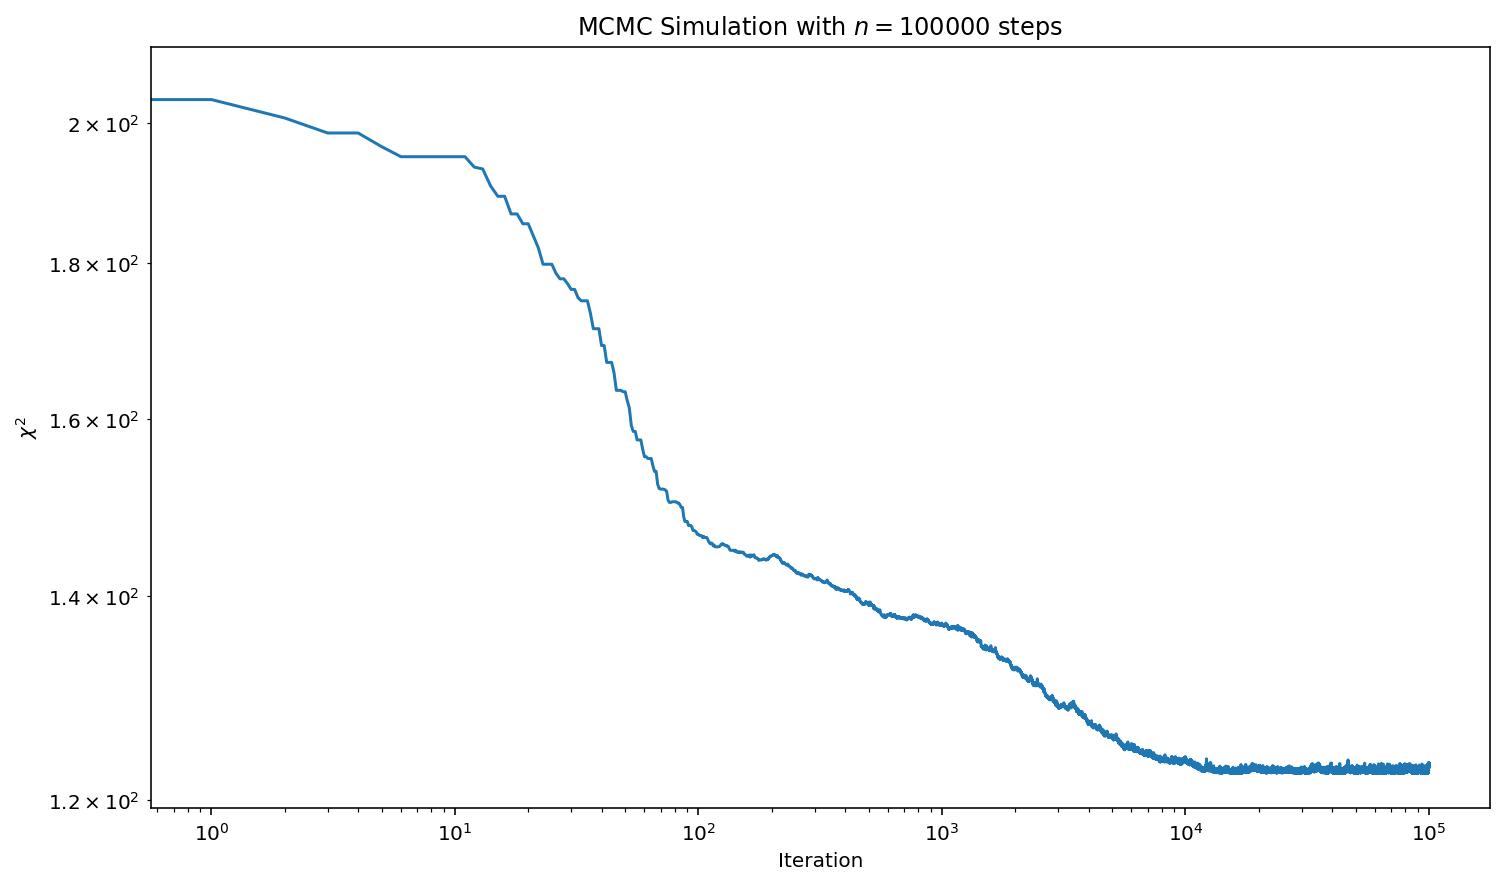

In [25]:
star2_step_sizes = 0.01, 0.5, 0.05, 0.5
star2_data = star2_time, star2_rad_vel, star2_rad_vel_err # The data we're fitting

star2_v0, star2_Tp, star2_K, star2_P, star2_chisq = MCMC_fit(100_000, 10, star2_step_sizes, star2_data, star2_param_guess)

In [26]:
"""
Isolate the posterior from the chi^2 plot and then save the parameter values at the lowest chi^2 in variables.
"""

star2_slice = 40_000

star2_v0_post = star2_v0[star2_slice:]
star2_Tp_post = star2_Tp[star2_slice:]
star2_K_post = star2_K[star2_slice:]
star2_P_post = star2_P[star2_slice:]
star2_chisq_post = star2_chisq[star2_slice:]

star2_min = np.argmin(star2_chisq_post)

star2_v0_min = star2_v0_post[star2_min]
star2_Tp_min = star2_Tp_post[star2_min]
star2_K_min = star2_K_post[star2_min]
star2_P_min = star2_P_post[star2_min]
star2_chisq_min = star2_chisq_post[star2_min]

Weighted chi-squared = 122.4905693427283
v0 = -1.7099263548803276
Tp = 563.7361633037567
K = 39.40061869602919
P = 635.5834579193988


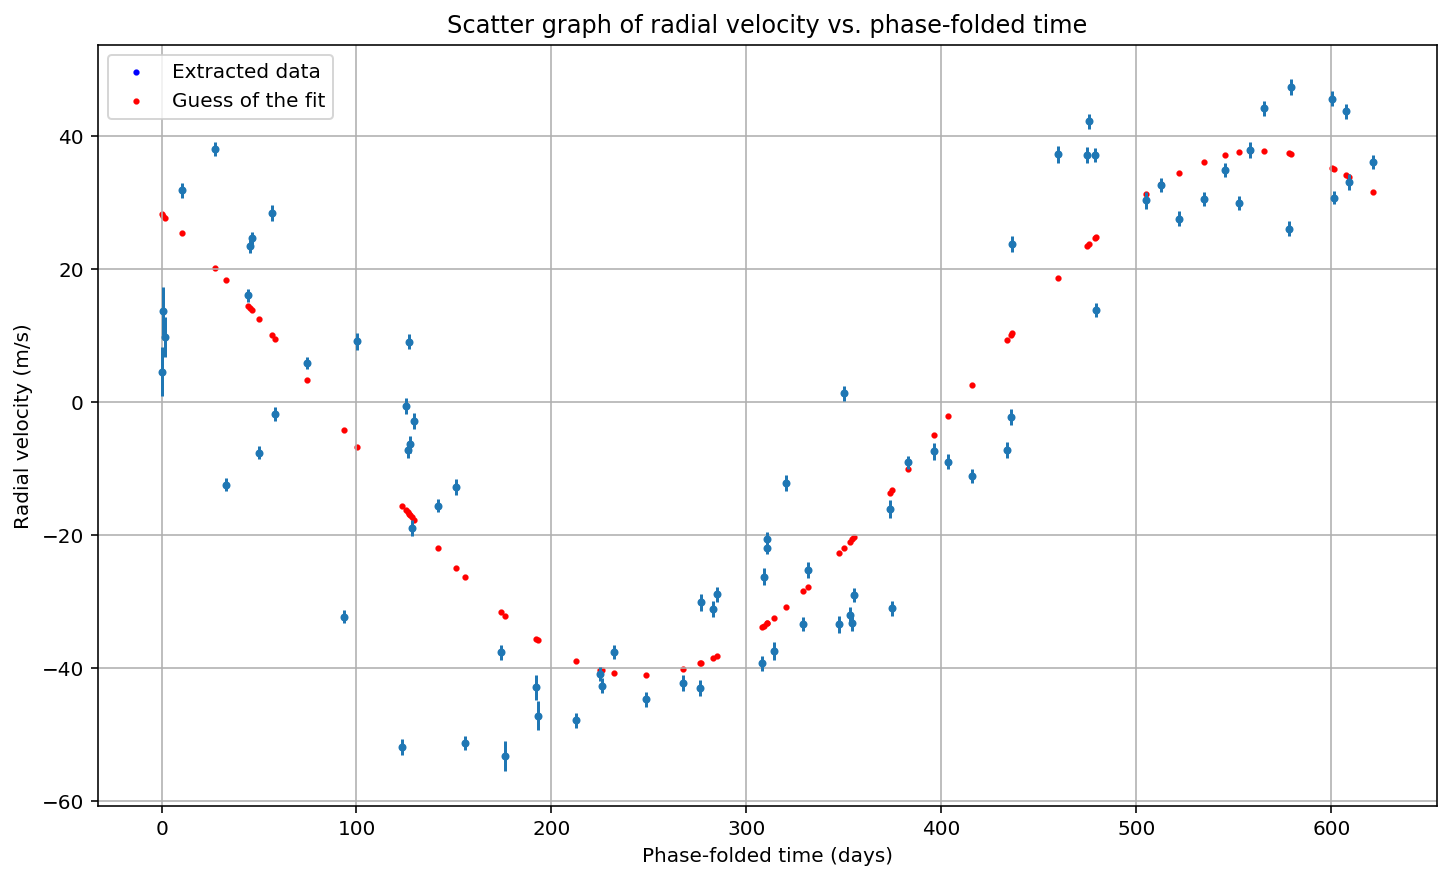

In [27]:
star2_param_fitted = star2_v0_min, star2_Tp_min, star2_K_min, star2_P_min

star2_tfolded = (star2_time - star2_time[0]) % star2_param_fitted[3]

print("Weighted chi-squared =", weighted_chi2(calc_rad_vel, (star2_time, star2_rad_vel, star2_rad_vel_err), star2_param_fitted))

print("v0 =", star2_param_fitted[0])
print("Tp =", star2_param_fitted[1])
print("K =", star2_param_fitted[2])
print("P =", star2_param_fitted[3])

plot_fit(star2_time, star2_tfolded, star2_rad_vel, star2_rad_vel_err, star2_param_fitted)

### 3.3. Calculating the semi-major axis and exoplanetary masses for all three stars

In [28]:
star_name = [peg51_name, star1_name, star2_name]
star_mass = [peg51_mass, star1_mass, star2_mass]

star_K = [peg51_param_fitted[2], star1_param_fitted[2], star2_param_fitted[2]]
star_P = [peg51_param_fitted[3], star1_param_fitted[3], star2_param_fitted[3]]

print("---------------------------------------------------------------------------------------------------------")
print("| {0:^10} | {1:^22} | {2:^} | {3:^} |".format("Star", "Orbital period (days)", "Semi-major axis (AU)", "Planetary mass, Msin(I) (Jupiter masses)"))
print("---------------------------------------------------------------------------------------------------------")


for i in range(3):
    sem_majorax = calc_sem_majorax(star_P[i], star_mass[i])
    mass_plan_inc = calc_mass_plan_inc(star_P[i], star_K[i], star_mass[i])

    print("| {0:^10} | {1:^22.10f} | {2:^20.10f} | {3:^40.10f} |".format(star_name[i], star_P[i], sem_majorax, mass_plan_inc))

print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
|    Star    | Orbital period (days)  | Semi-major axis (AU) | Planetary mass, Msin(I) (Jupiter masses) |
---------------------------------------------------------------------------------------------------------
|   Peg-51   |      4.2308532541      |     0.0518723180     |               0.4527134604               |
|  star-01   |      7.9749083609      |     0.0823224567     |               0.2748056821               |
|  star-02   |     635.5834579194     |     1.6598924155     |               2.1925219454               |
---------------------------------------------------------------------------------------------------------


## 4. Discussion

The ${\chi^2}$ values obtained by using a variant of the Metropolis-Hastings algorithm were 70.13401500703068, 12.644226985302133 and 122.48987024410563 for 51 Pegasi, star 01 and star 02, respectively. Thought the ${\chi^2}$ for 51 Pegasi was within the expected range (between 70 and 80), the ${\chi^2}$ for star 01 and star 02 were suprising. This was especially true for star 01 which had an exceptionally low ${\chi^2}$. On the flip side, however, star 02 was near the opposite end of the spectrum, but was closer to 51 Pegasi. If the ${\chi^2}$ value for star 01 holds true, one could potentially focus on the other two stars to minimise their ${\chi^2}$ value which was a goal of this project when fitting a circular orbit to the data.

To get an idea of the quality of the fits, the residuals, the numerator in the weighted_chi2() function, were plotted against time for each star, as seen below.

The residuals for 51 Pegasi were plotted against time. The residuals were calculated as the numerator in the chi^2 function above, and around should be positive and half negative to indicate a good fit. However, in this case, there is a clear increasing trend in the plot, suggesting the error in the radial velocity is increasing. [4] From this, it can be seen that the fit is not a good one, perhaps better parameter values existed which were not able to be found.

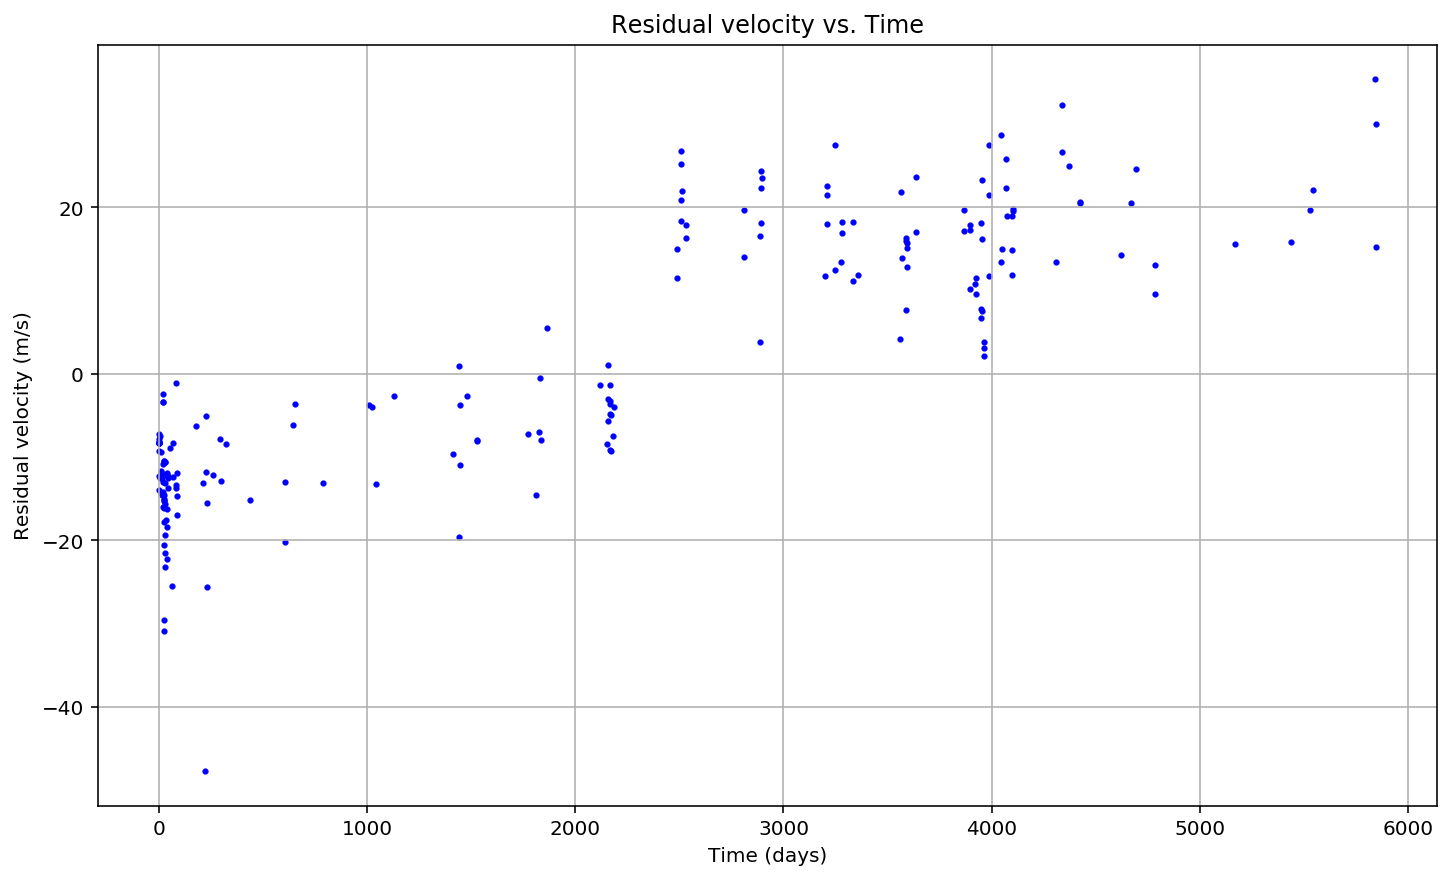

In [29]:
#Plots the residuals vs. time.

plt.figure()

plt.scatter(peg51_time, calc_residual(peg51_time, peg51_rad_vel, peg51_param_fitted), color = 'b', marker = '.', linewidths = 0.1)

plt.title('Residual velocity vs. Time')
plt.xlabel('Time (days)')
plt.ylabel('Residual velocity (m/s)')

plt.grid()

As with the residuals from the '51-Peg' dtaa file, around half are positive. However, in this case, there is no slope evident in them, suggesting the fit is a good one in this case as the error variance [4] remains constant.

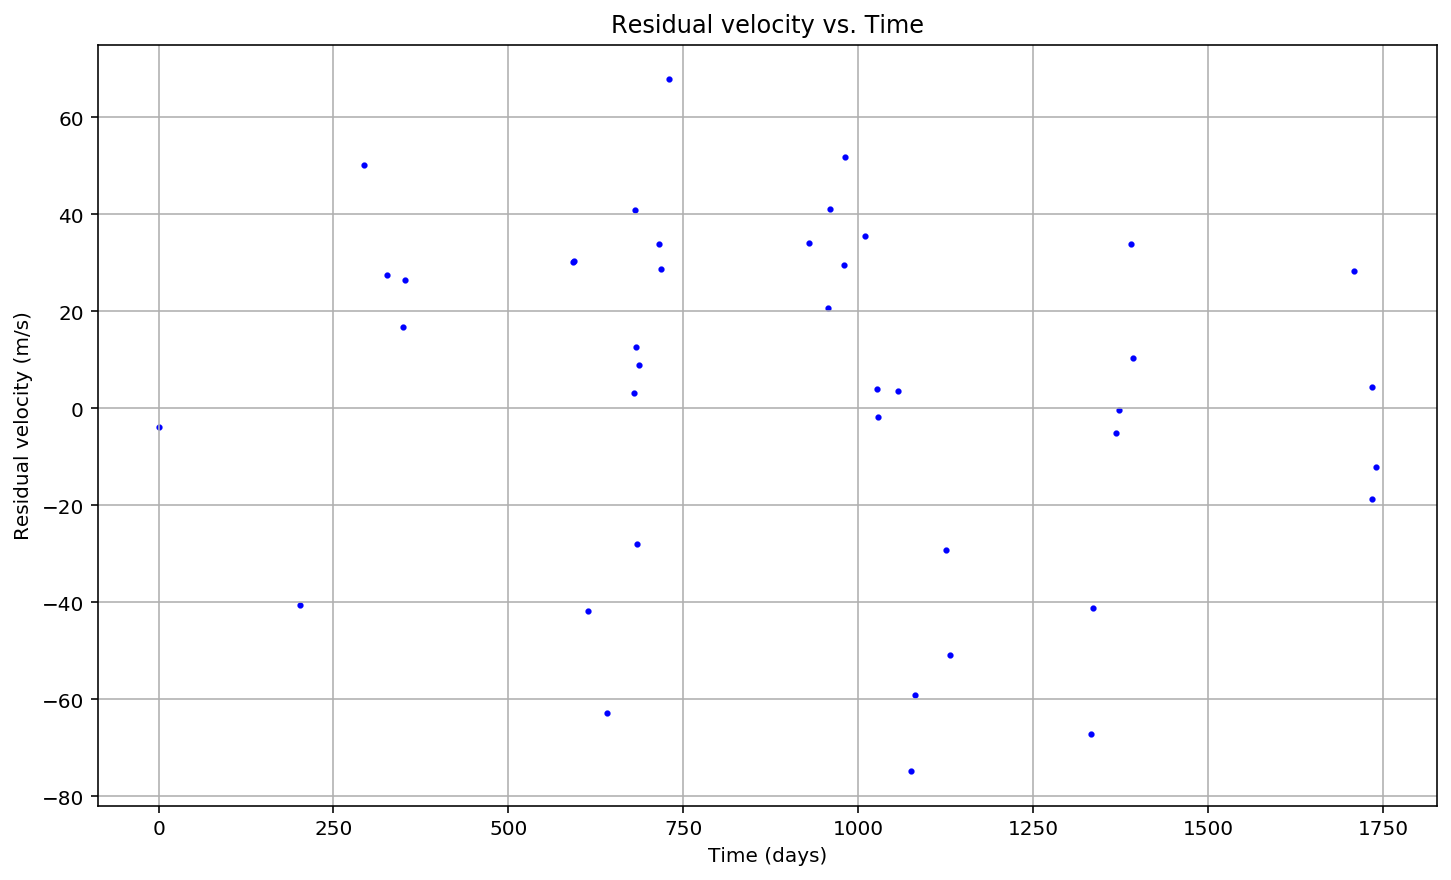

In [30]:
#Plots the residuals vs. time.

plt.figure()

plt.scatter(star1_time, calc_residual(star1_time, star1_rad_vel, star1_param_fitted), color = 'b', marker = '.', linewidths = 0.1)

plt.title('Residual velocity vs. Time')
plt.xlabel('Time (days)')
plt.ylabel('Residual velocity (m/s)')

plt.grid()

Like the previous residual plots for the '51-Peg' and 'star-01' data files, the residual plot for the 'star-02' file has roughly half positive and half negative residual values. In this case, however, a slight decreasing trend can be seen, indicating a decrease in the error variance with the calculated radial velocity [4].

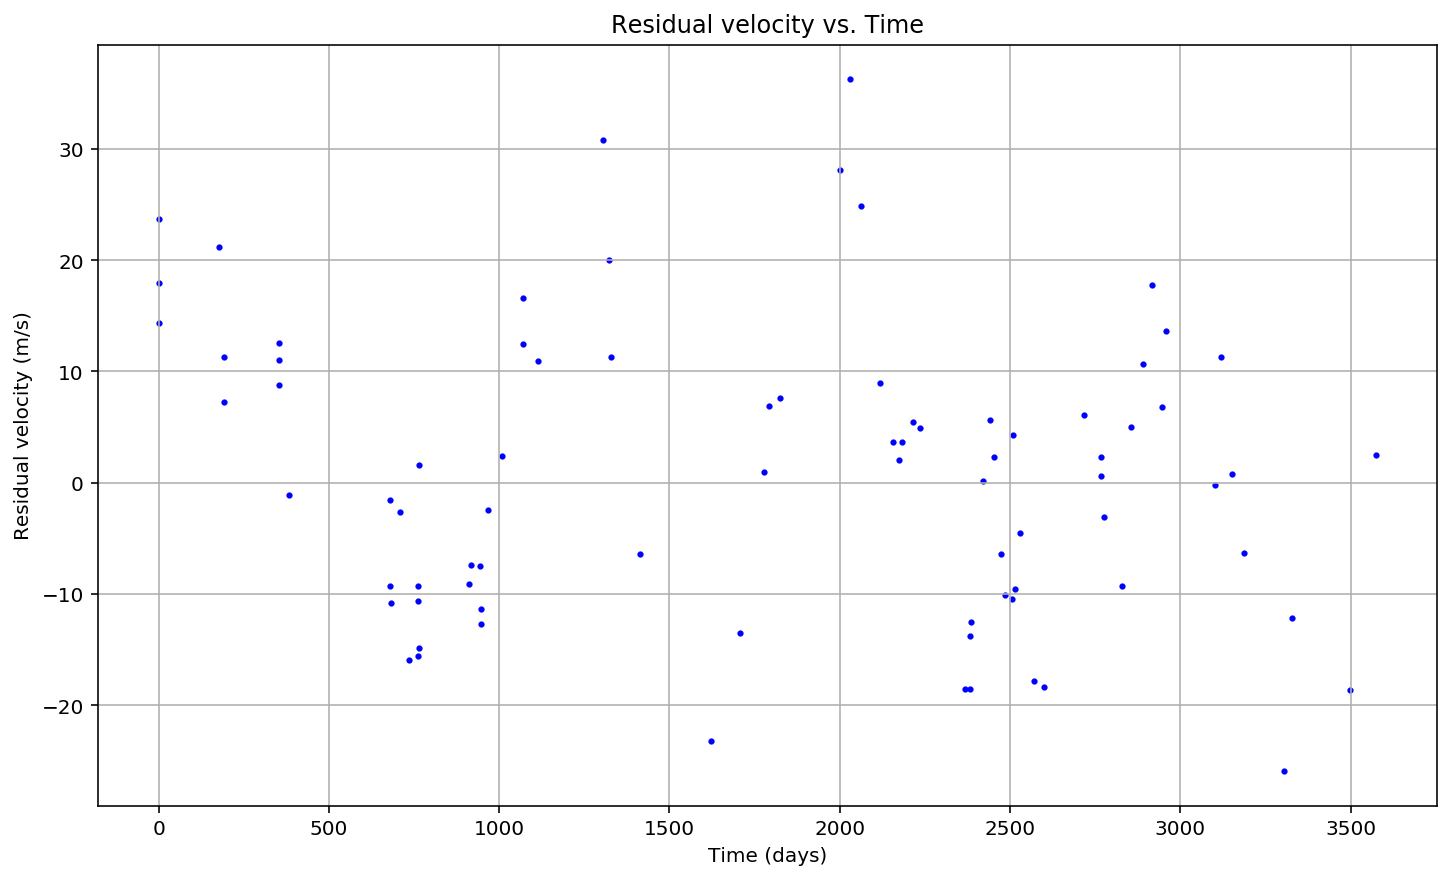

In [31]:
#Plots the residuals vs. time.

plt.figure()

plt.scatter(star2_time, calc_residual(star2_time, star2_rad_vel, star2_param_fitted), color = 'b', marker = '.', linewidths = 0.1)

plt.title('Residual velocity vs. Time')
plt.xlabel('Time (days)')
plt.ylabel('Residual velocity (m/s)')

plt.grid()

As shown in section 3.3, the semi-major axis and planetray mass values were calculated for the three stars from their data files, shown in the table below [5].

|   File Name   | Stellar Mass $(M_*/M_{\odot})$ | Semi-major Axis (AU) | Planetary mass, $M \sin I (M_\text{Jupiter})$ | Orbital period (days) |
|      ---      |               ---              |         ---          |                      ---                      |          ---          |
|  `51-Peg.dat` |              1.04              |     0.0518723337     |                  0.4492608623                 |      4.2308551766     |
| `star-01.dat` |              1.17              |     0.0823212825     |                  0.2713505561                 |      7.9747377324     |
| `star-02.dat` |              1.51              |     1.6599971222     |                  2.1926951681                 |     635.6435981667    |


The primary objective of this project was to calculate the semi-major axis and planetary mass of exoplanets given the radial velocity data of their host stars. To this extent, the calculated semi-major axis of 51 Pegasi b was 0.0518723337 AU compared to the known value of 0.05211 ± 0.00087 AU [3] which equated to an error of 0.46%. Similarly, the known planetary mass of 51 Pegasi b is 0.461 ± 0.0164 $M_\text{Jupiter}$ [3] while the calculated mass was 0.4492608623 $M_\text{Jupiter}$, yielding an error of 2.60%. This, however, was a much larger than the error in the semi-major calculation which may have been due to the dependence of the mass funciton on two calculated parameters: the velocity semi-amplitude, K, and the orbital period, P. Therefore, the error from both parameters was propagated while only the orbital period was used for the semi-major axis calculation.

Based off the calculations for 51 Pegasi and its planet, it can be assumed that the semi-major axis and planetary mass caclculations for star 01 and star 02 were of a similar accuracy; however, judging from their respective ${\chi^2}$ values, the calculations for star 02 were the least accurate of the three.

Despite inaccuracies, it was elucidated that exoplanet orbitting star 02 is the most massive of the three considered with a mass of 2.1926951681 $M_\text{Jupiter}$, followed by 51Pegasi b at 0.4492608623 $M_\text{Jupiter}$, and thenstar 01's planet with a mass of 0.2713505561 $M_\text{Jupiter}$. This constrasted with the given stellar masses as star 01 was more massive than 51 Pegasi.

Interestingly, the orbital periods increased when moving down the table, above, from 51 Pegasi b to star 01's planet to star 02's planet though the increase here is much greater. AS was the case with the stellar masses, this trend was not observed in the calculated planetary masses.

## 5. Conclusions

In conclusion, this project has been successful in analysing the characteristics of exoplanets, primarily the length of the semi-major axis of their orbits around the host star, and their planetary mass in the line of sight of the Earth. This was carried out using a variant of the Metropolis-Hastings algorithm. This Markov chain Monte Carlo simulation was able to evaluate the paramter values necessary in calculating the radial velocity of a circular orbit which was then fitted to the data, approximated as circular orbits. This simulation greatly improved the initial guesses that were made for the paramters; this was evident in the plots of the calculated radial velocity against phase-folded time. Fromt this investigation, the semi-major axes were calculated as 0.0518723337 AU, 0.0823212825 AU and 1.6599971222 AU for the exoplanets of 51 Pegasi, star 01 and star 02, respectively. In the same order, the line of sight masses for the stars' planets were 0.4492608623, 0.2713505561 and 2.1926951681, all measured in Jupiter masses. It may be of importance to use the data files for calculating other properties of both the star and the planet to give a broader and fuller view of the system. These could be used in tandem with the semi-major axis and planetary mass caclulations to show relations between different properties.

A particular weakness of the chosen approach is the reliance on trial and error when setting the initial parameters. Although this is accounted for by the random steps taken in the MCMC simulation, the method is still somewhat time-consuming. This is made evident when setting values for ${\beta}$ and the step sizes as they need to be tuned for every different data file.

A potential caveat to using the MCMC simulation is the random steps taken and their influence over the final result. An improvement to this could be using a greaater number of steps (for example, 1,000,000 instead of 100,000) which, as discussed previously in section 2.4, could yield more precise values for the parameters; however, this would be much more intensive on both time and computer memory.

Additionally, currently the posterior needs to be sliced manually for each new data file. This can be offset as the location of the posterior is almost constant for the same data file, so it only needs to be located once every time new data is used.

In future itertions of this project, it may be useful to have multiple data files for each star which can then be used to calculate a better, and more accurate, average of the smi-major axis and the planetary mass.

## 6. References

[1] Wolf, P., n.d. Extrasolar Planets. [online] Lasp.colorado.edu. Available at: <https://lasp.colorado.edu/outerplanets/exoplanets.php> [Accessed 10 November 2021].

[2] Vladilo, G., 2019. Exoplanets Doppler Method. [online] Wwwuser.oats.inaf.it. Available at: <https://wwwuser.oats.inaf.it/vladilo/PianetiAstrobiologia/aa1920/B03_doppler.pdf> [Accessed 10 November 2021].

[3] Fakhouri, O. and Wright, J., n.d. Exoplanet Orbit Database | Exoplanet Data Explorer. [online] Exoplanets.org. Available at: <http://exoplanets.org/> [Accessed 9 November 2021].

[4] Originlab.com. n.d. Help Online - Origin Help - Residual Plot Analysis. [online] Available at: <https://www.originlab.com/doc/origin-help/residual-plot-analysis> [Accessed 13 November 2021].

[5] Stack Overflow. 2018. Tables in Markdown (in Jupyter). [online] Available at: <https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter> [Accessed 14 November 2021].

Planetary Sciences, dePater and Lissauer, Cambridge University Press.  Chapter 12 Extrasolar Planets, A basic introduction to exoplanet detection (we will cover this in SPA5241 Planetary Systems).
https://www-cambridge-org.ezproxy.library.qmul.ac.uk/core/services/aop-cambridge-core/content/view/B9D9098C7D89009AF578B7530CB4D844/9781316165270c12_p489-511_CBO.pdf/extrasolar_planets.pdf

Lovis, C. and Fischer, D., 2010. Radial VElocity Techniques for Exoplanets. [online] Exoplanets.astro.yale.edu. Available at: <http://exoplanets.astro.yale.edu/workshop/EPRV/Bibliography_files/Radial_Velocity.pdf>